In [1]:
#This project focuses on testing ensemble methods to increase accuracy of models to predict insurance fraud

In [2]:
#Import Libraries

#preliminary data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

#OneHot Encoding categorical data into numerical
from sklearn.preprocessing import OneHotEncoder

#Split the Data
from sklearn.model_selection import train_test_split 

#Balance the Data - balance only the training dataset
#Import Libraries for balancing
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

#Develop the Models
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#The Models
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#!pip install keras 
#!pip install --upgrade h5py
#!pip install TensorFlow
#!pip install scikeras

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from scikeras.wrappers import KerasClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#Ensemble Learning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [3]:
#housekeeping
pd.set_option('display.max_columns', None) #allow to see all columns when looking at head.

In [4]:
#THE DATA
df=pd.read_csv("C:\\Users\\carol\\Desktop\\School\\Ryerson\\CIND860\\insurance_claims.csv") #can also be downloaded from the Github repository

In [5]:
##Exploring the Data

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
df = df.drop("_c39", axis=1) # junk column

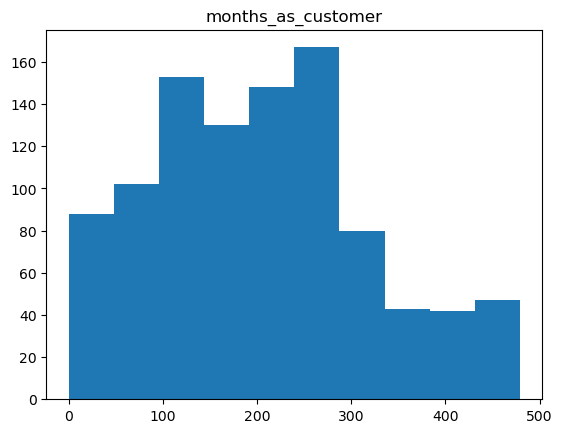

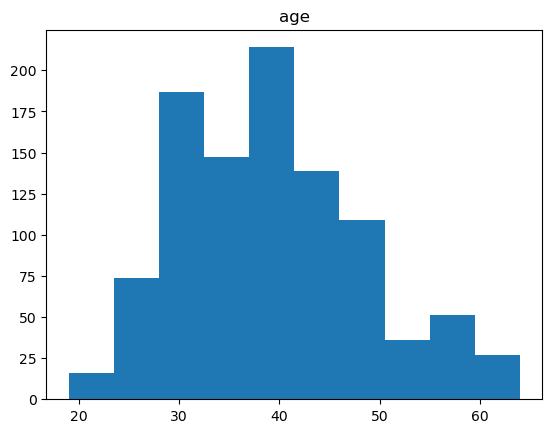

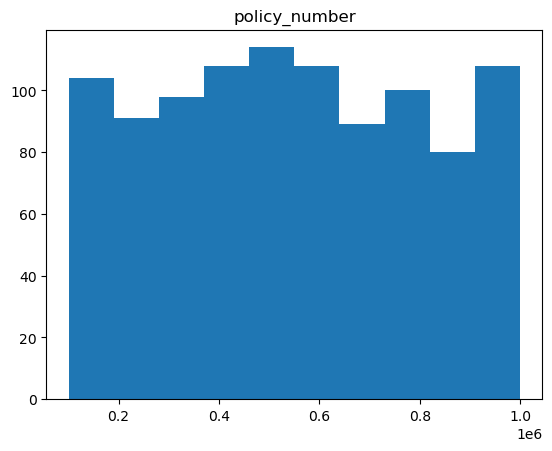

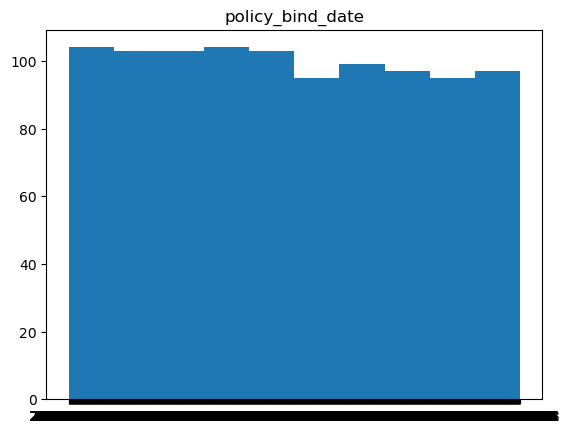

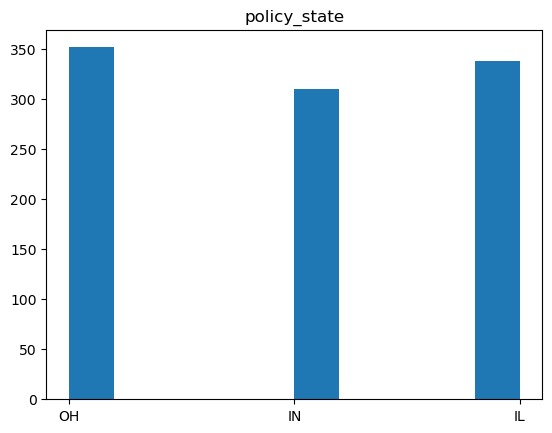

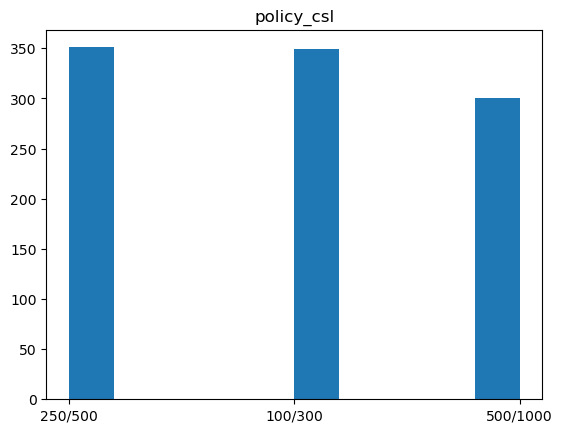

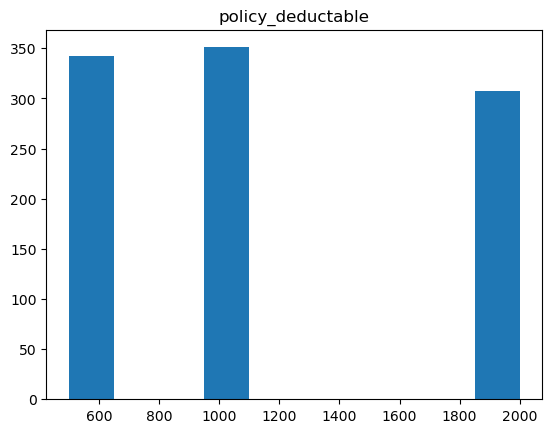

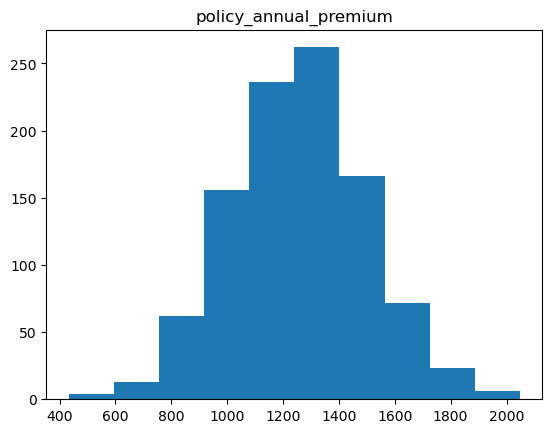

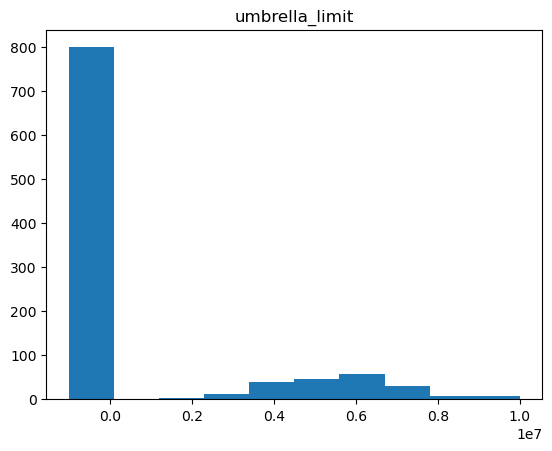

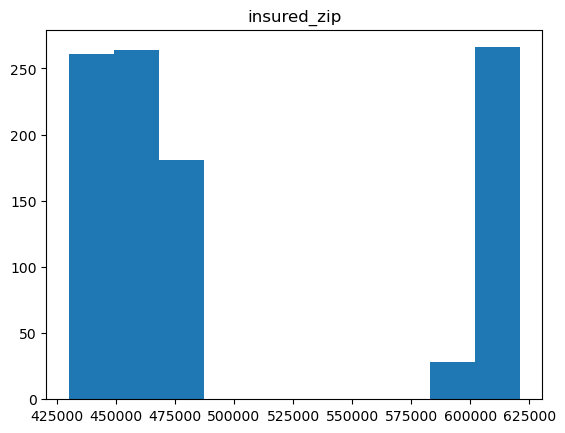

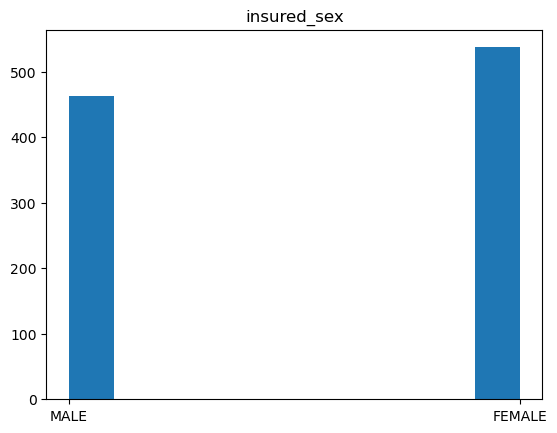

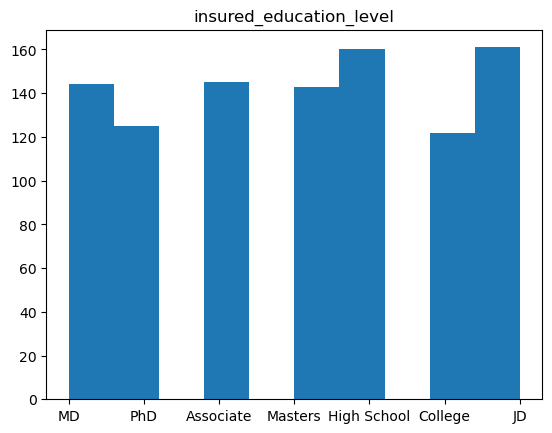

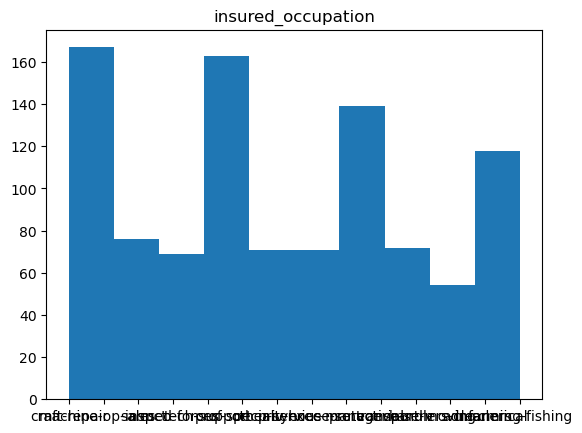

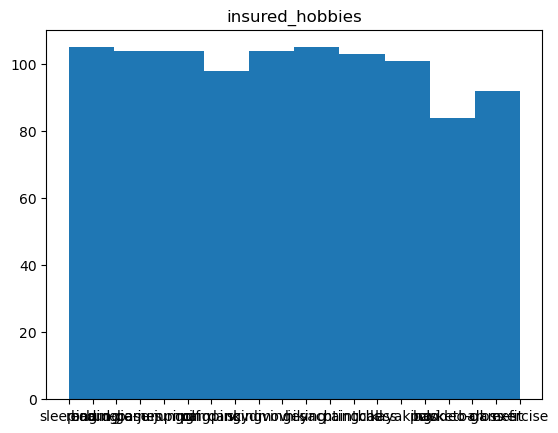

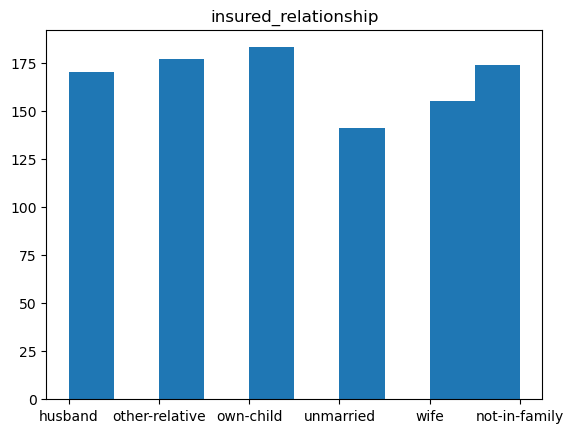

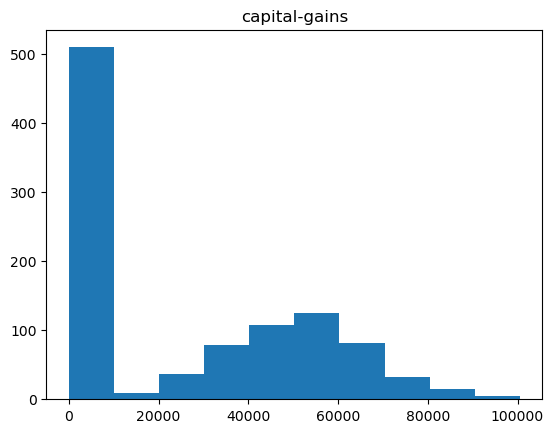

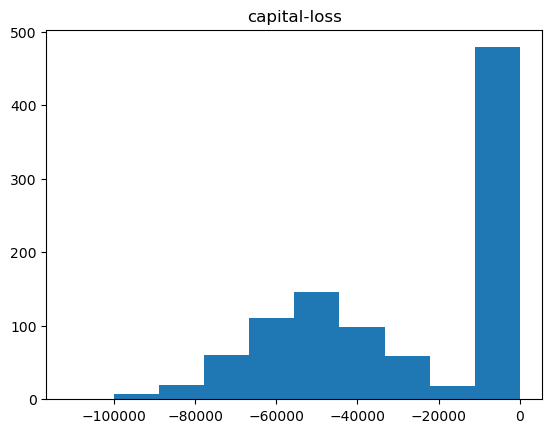

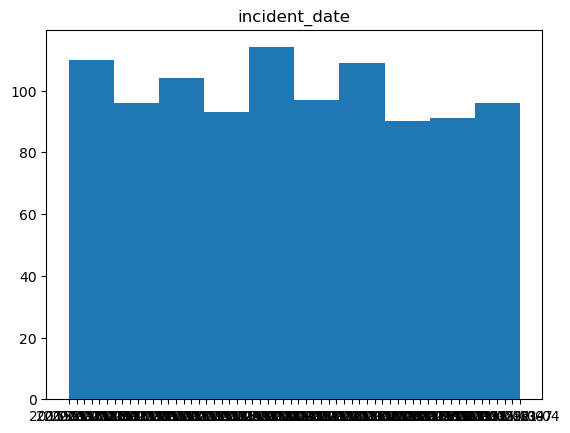

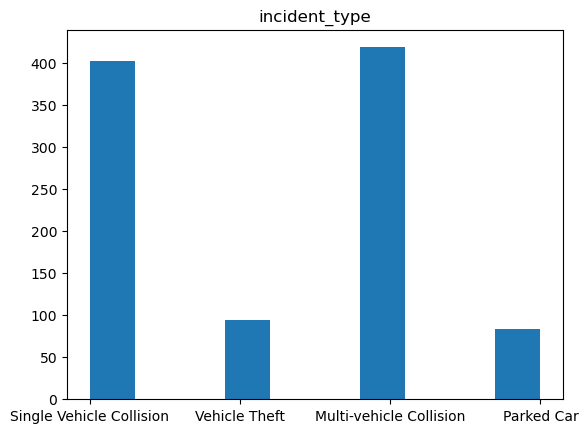

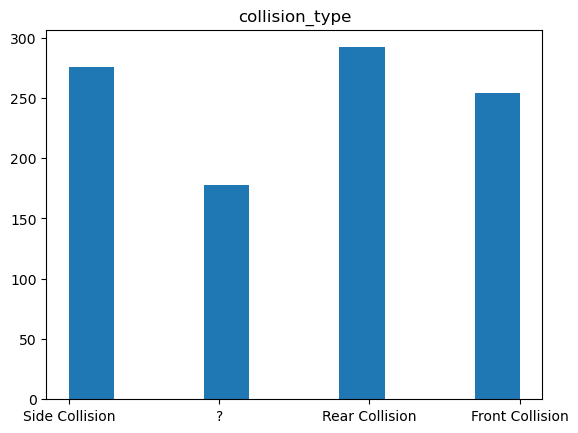

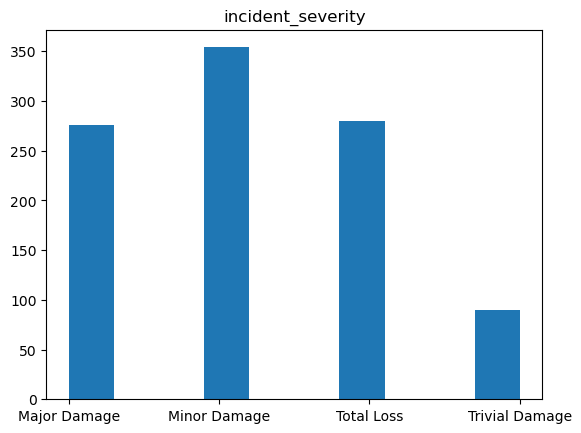

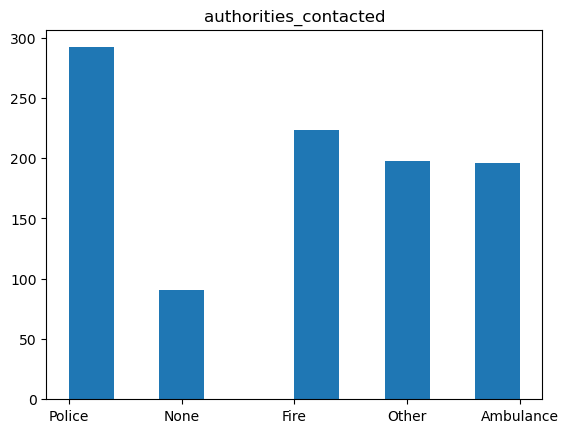

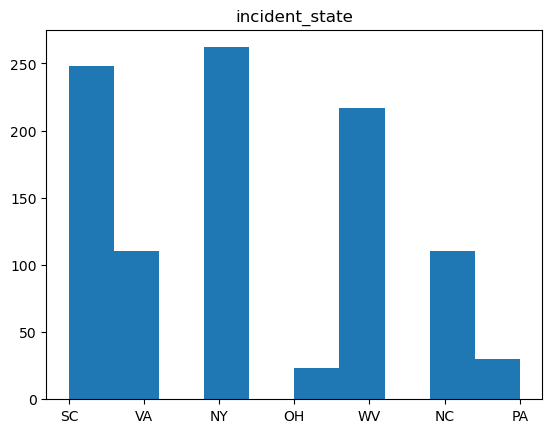

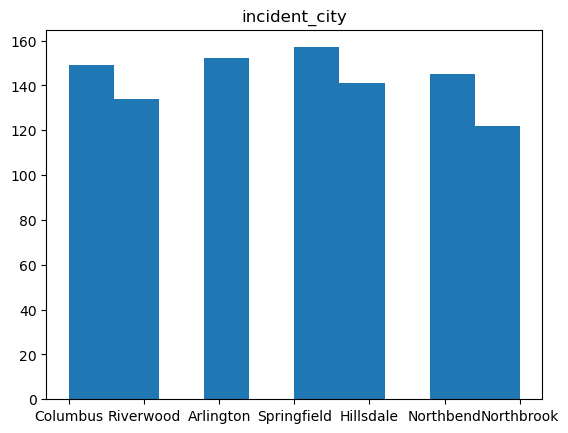

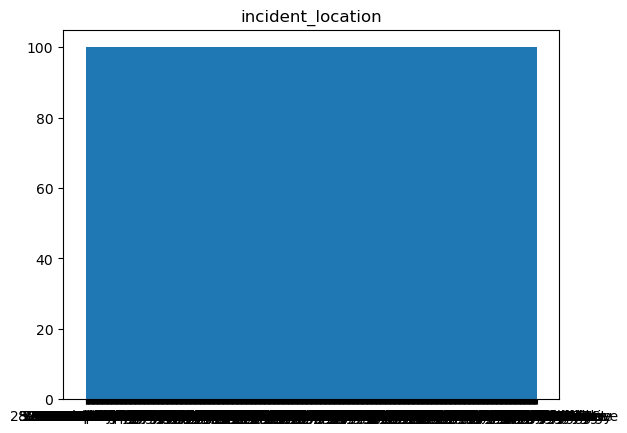

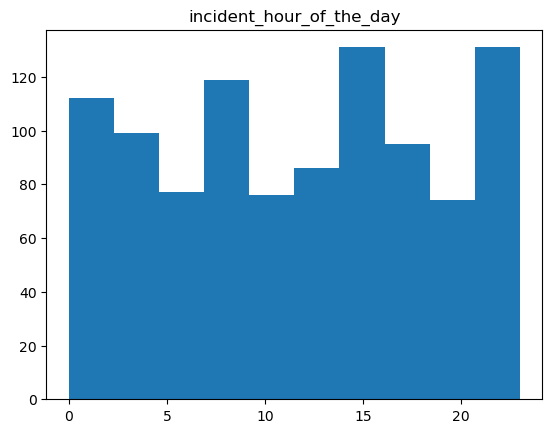

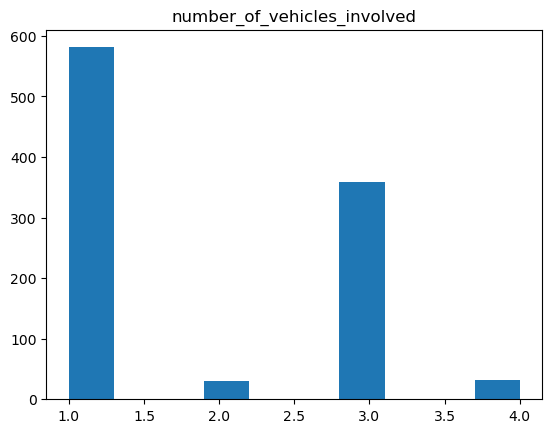

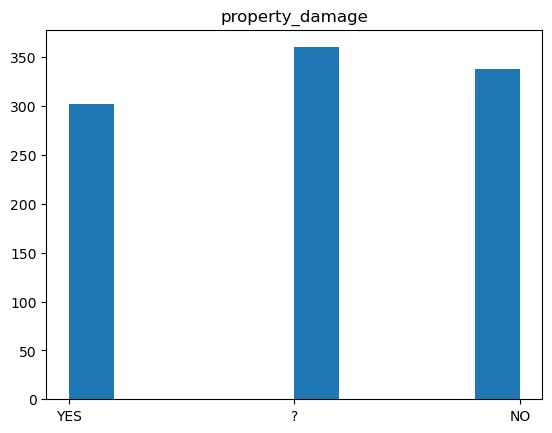

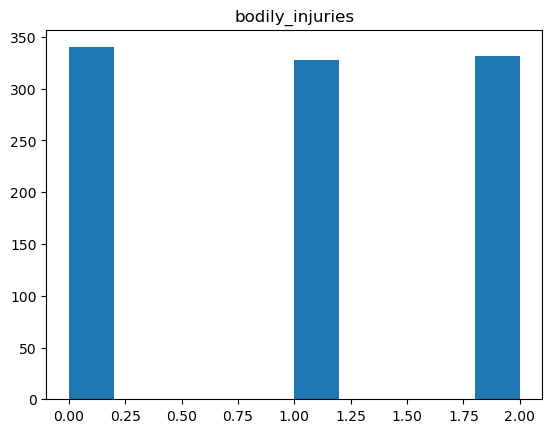

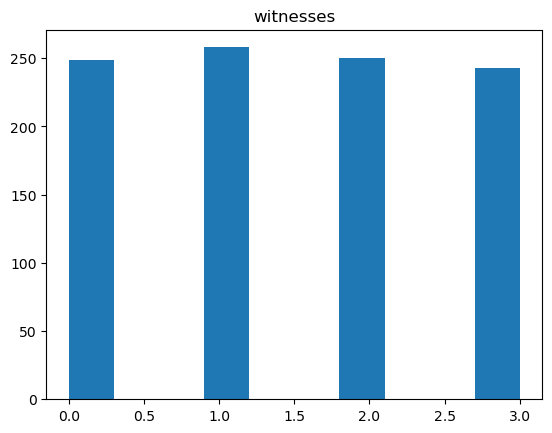

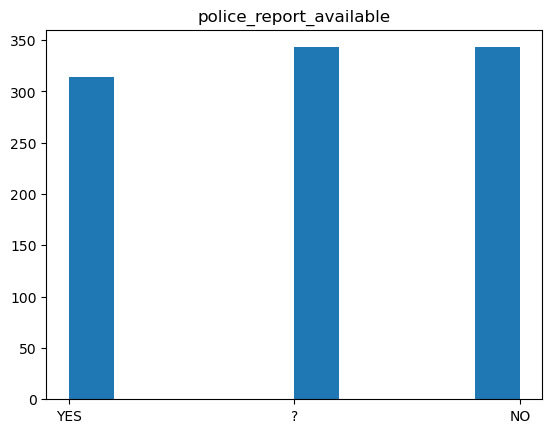

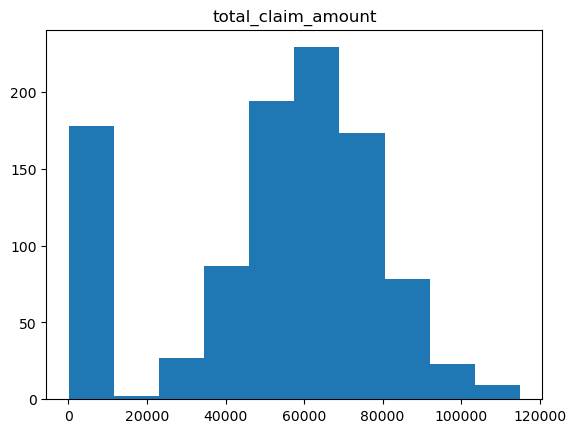

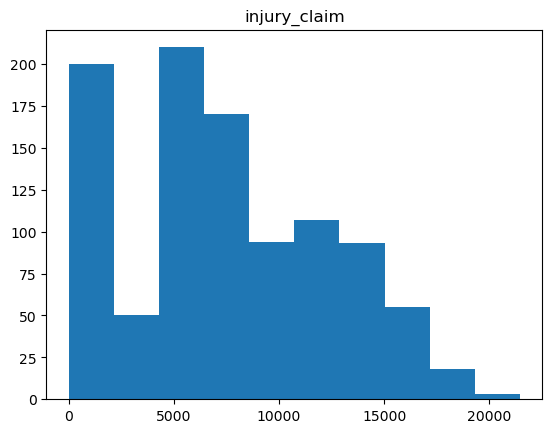

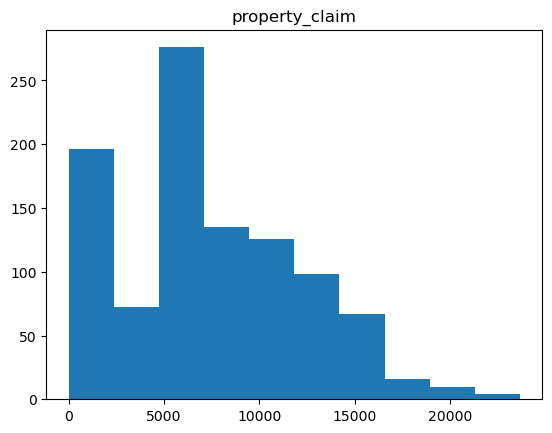

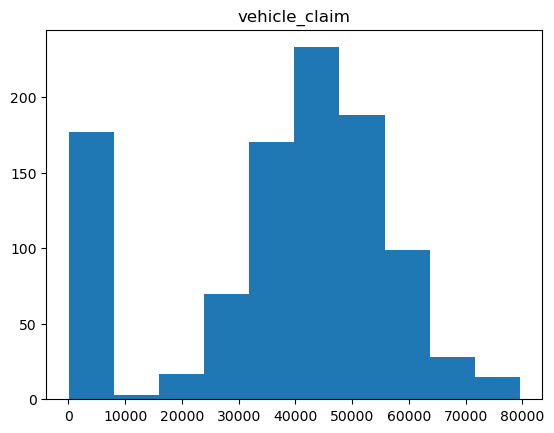

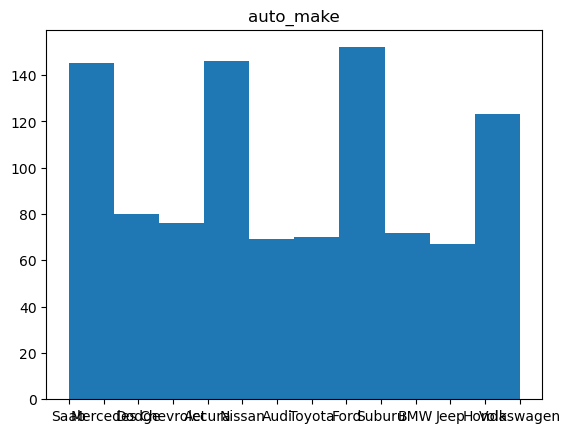

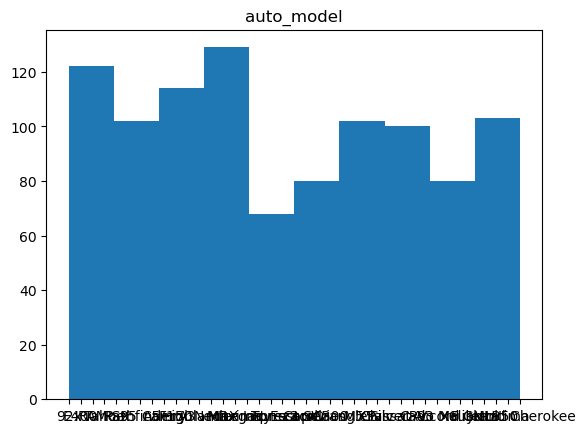

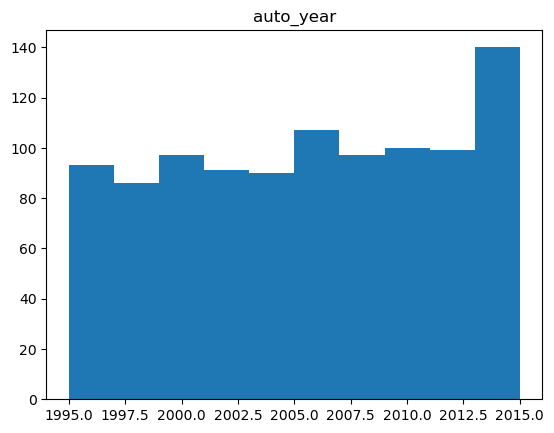

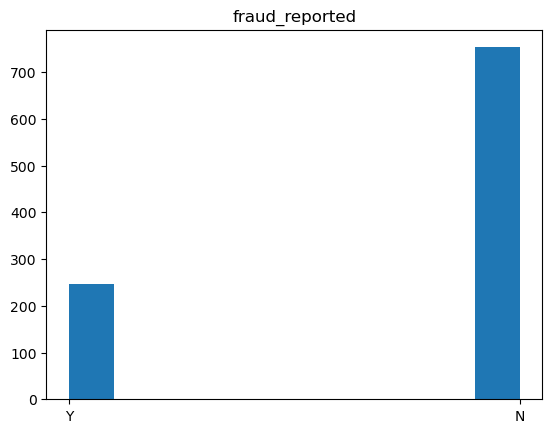

In [10]:
#plot the quantitative features to visualize and see whether there is normal distribution
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [11]:
#Correlations
df.corr()

C:\Users\carol\AppData\Local\Temp\ipykernel_26688\1874986527.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


C:\Users\carol\AppData\Local\Temp\ipykernel_26688\133148687.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

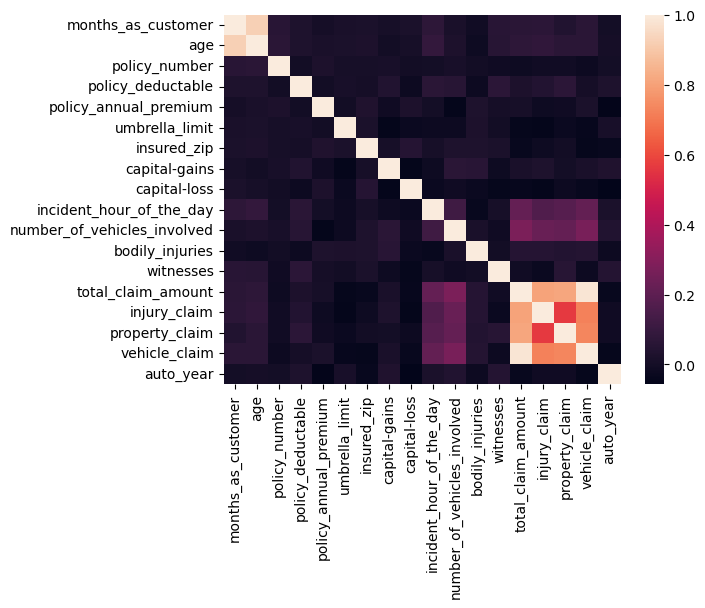

In [12]:
corr=df.corr()
sns.heatmap(corr)

In [13]:
#Investigate the distribution of the fraud reported column
num_fraud = df["fraud_reported"].value_counts()
num_fraud

N    753
Y    247
Name: fraud_reported, dtype: int64

([<matplotlib.patches.Wedge at 0x261a0d61940>,
 [Text(-0.7851136132870644, 0.7704522141128092, 'No'),
  Text(0.785113649354535, -0.7704521773589873, 'Yes')])

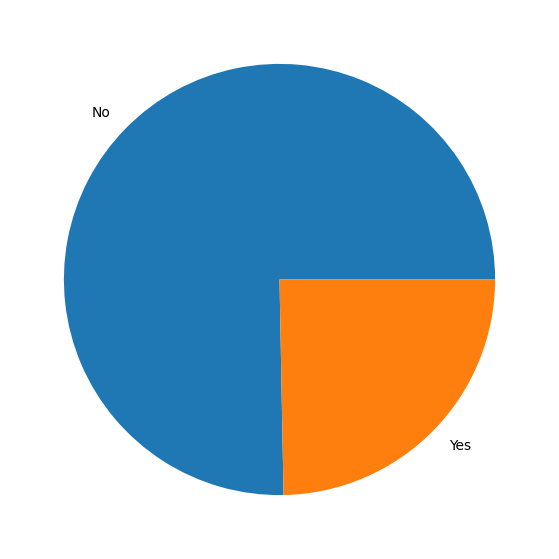

In [14]:
fig = plt.figure(figsize=(10, 7))
plt.pie(num_fraud, labels=["No", "Yes"])

In [15]:
#DATA CLEANING

In [16]:
#change capital loss to positive (+) intergers for clarity
df["capital-loss"] = df["capital-loss"]*-1

In [17]:
#Quantifying features
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})
df['insured_sex'] = df['insured_sex'].map({'FEMALE': 1, 'MALE': 0})
df['insured_education_level'] = df['insured_education_level'].map({'High School': 0, 'College': 1, 'Associate': 2, 'Masters': 3, 'JD': 4, 'MD': 5, 'PhD': 6})
df['incident_severity'] = df['incident_severity'].map({'Trivial Damage': 0, 'Minor Damage': 1, 'Major Damage': 2, 'Total Loss':3})


In [18]:
#Adding Columns
df['auth_contact'] = np.where(df['authorities_contacted']== "None", 0, 1) #designates a binary distinction whether the authorities where contacted
df['same_state'] = np.where(df['policy_state']== df["incident_state"], 1, 0) #whether accident occured in the same state as issued policy

In [19]:
#Look at how many unique values in the features
num_unique_values = df.nunique()
column_names=list(df)

In [20]:
num_unique_values

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

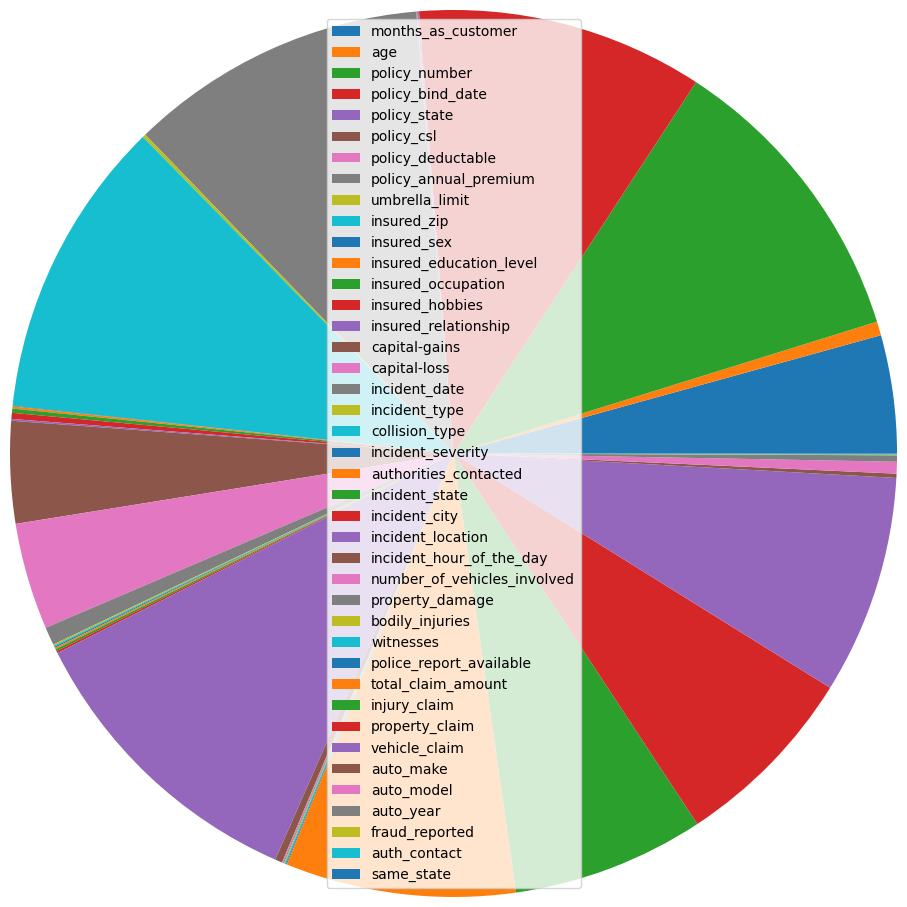

In [21]:
plt.pie(num_unique_values, radius=3)
plt.legend(labels=column_names, loc="center")
plt.show()

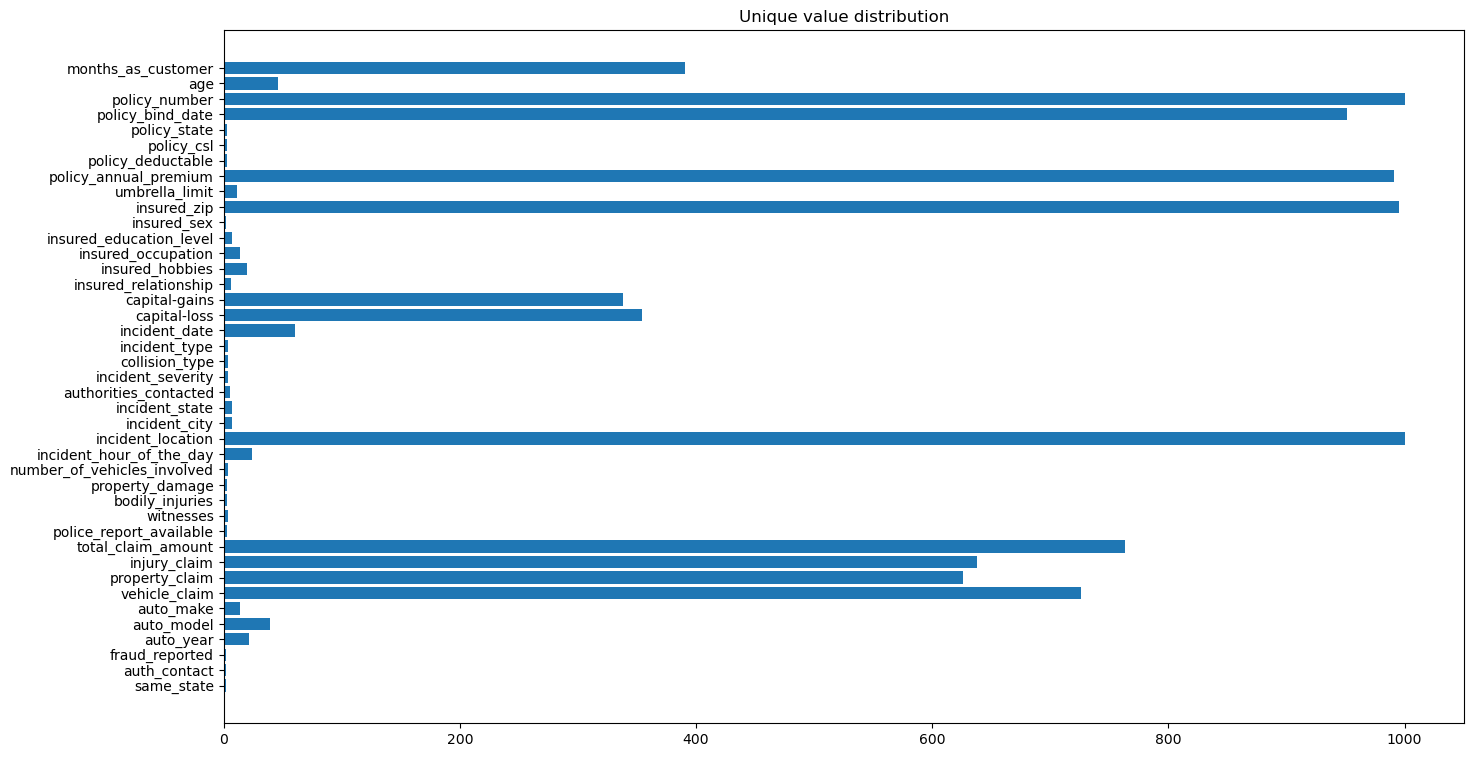

In [22]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(column_names, num_unique_values)
ax.invert_yaxis()
ax.set_title('Unique value distribution', loc ='center', )

plt.show()

In [23]:
#There are certain features which contain "?" as a value. 

#collision type has "?"
#property damage has "?"

df[df == "?"].count()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [24]:
list(df)

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 'auth_contact',
 'same_state']

In [25]:
#Dropping Columns
df = df.drop("policy_number", axis=1)
df = df.drop("incident_location", axis=1)
df = df.drop("incident_city", axis=1)
df = df.drop("incident_date", axis=1)
df = df.drop("auto_model", axis=1)
df = df.drop("policy_bind_date", axis=1)
df = df.drop("policy_csl", axis=1)
df = df.drop("policy_state", axis=1)
df = df.drop("incident_state", axis=1)
df = df.drop("insured_zip", axis=1) #highly unique

C:\Users\carol\AppData\Local\Temp\ipykernel_26688\605927212.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

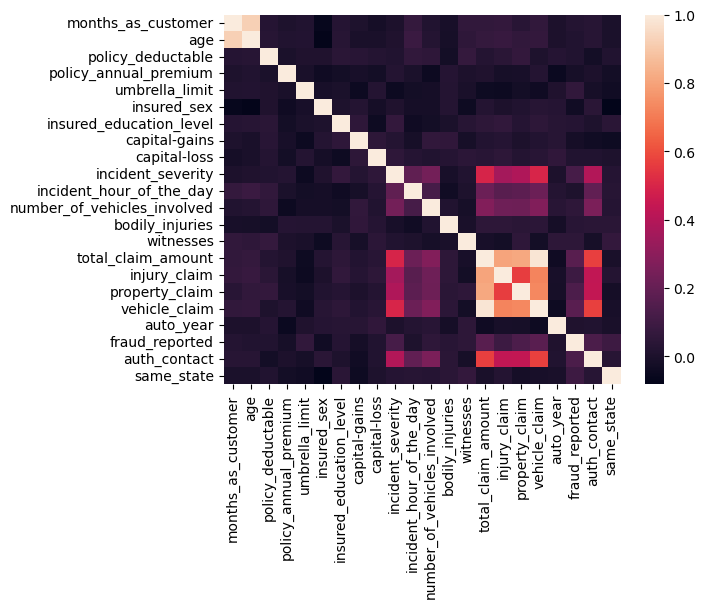

In [26]:
#look at correlations after substantial changes
corr=df.corr()
sns.heatmap(corr)

In [27]:
import matplotlib.pyplot as plt 

In [28]:
quant_cols=['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','insured_sex','insured_education_level','capital-gains',
 'capital-loss','incident_severity','incident_hour_of_the_day','number_of_vehicles_involved','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year', 'fraud_reported', 'auth_contact', 'same_state']

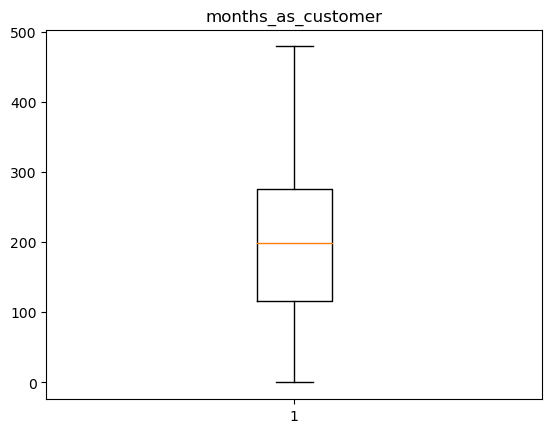

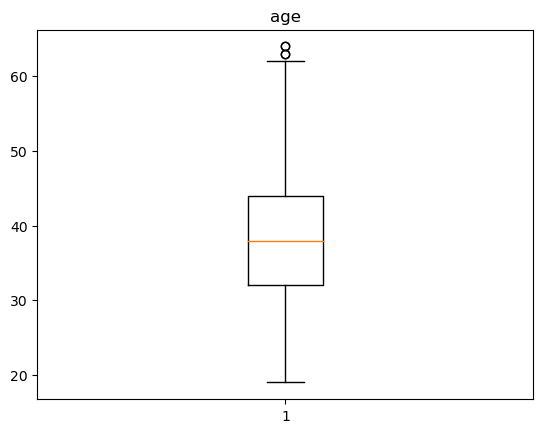

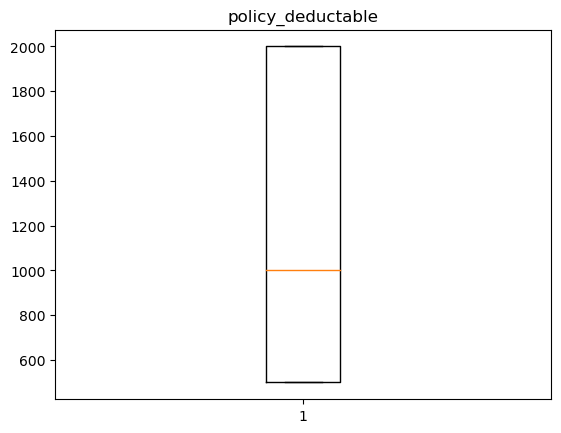

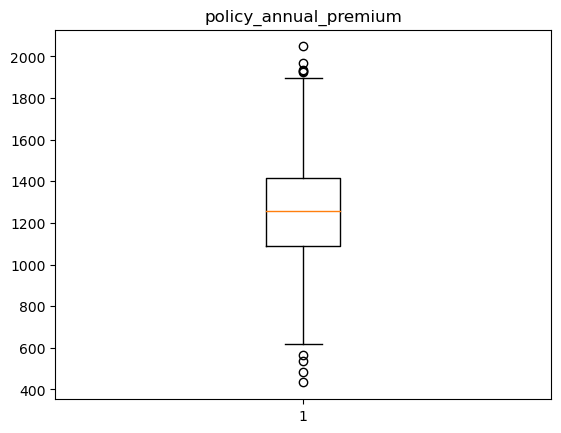

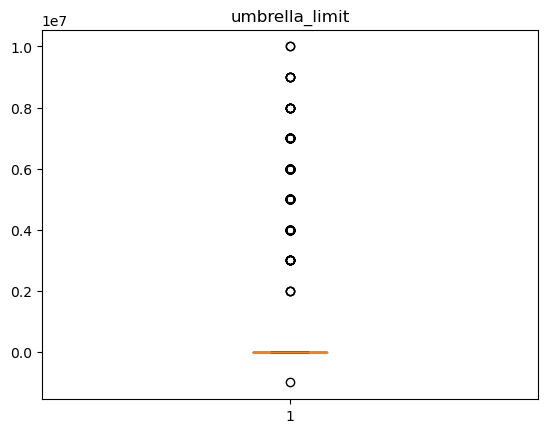

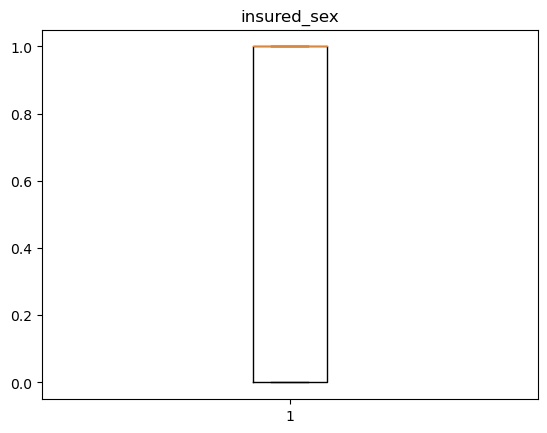

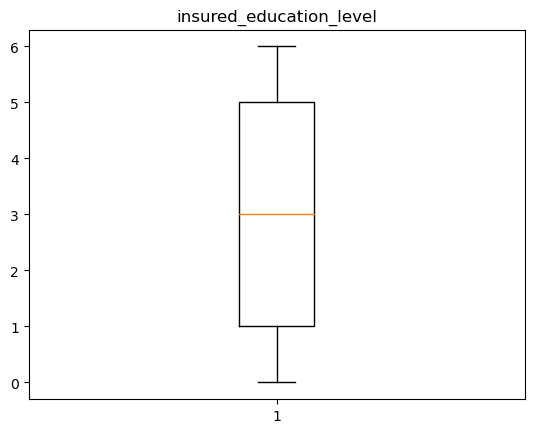

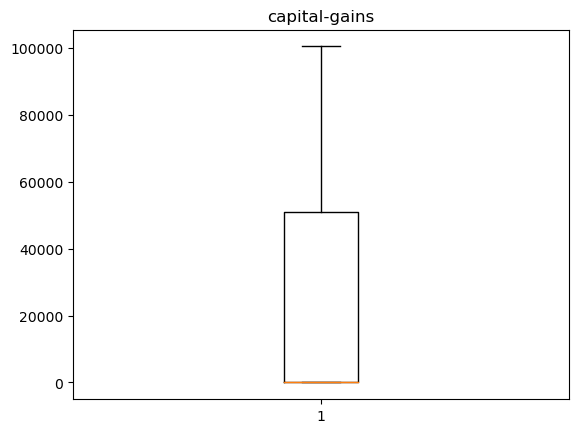

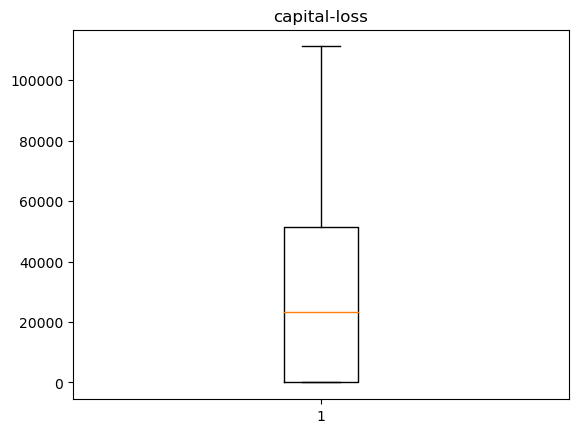

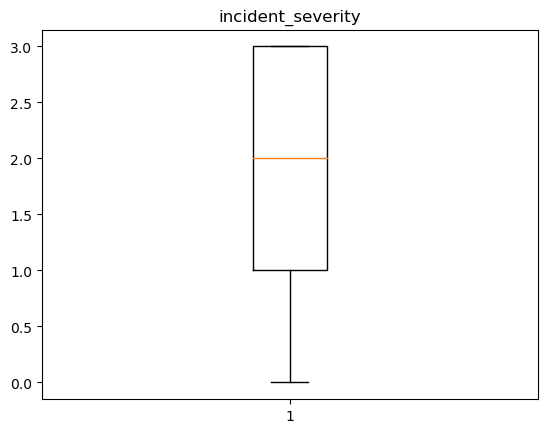

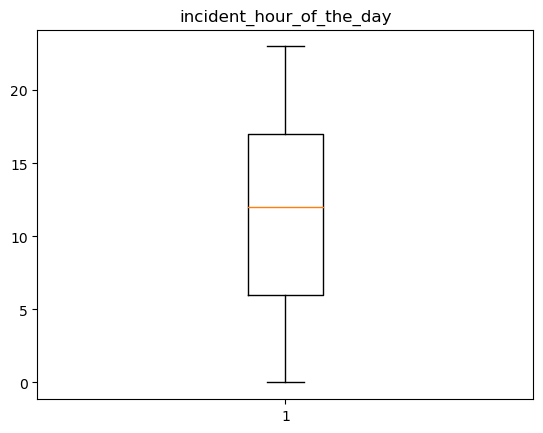

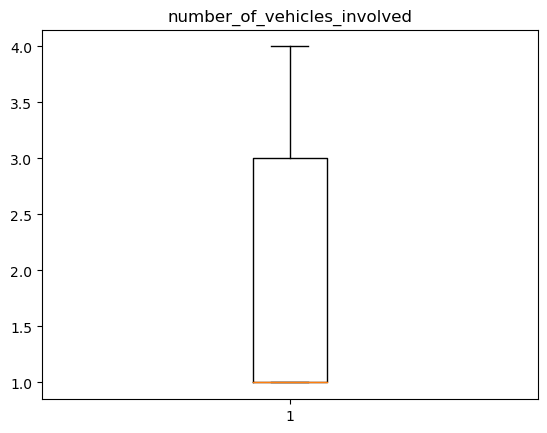

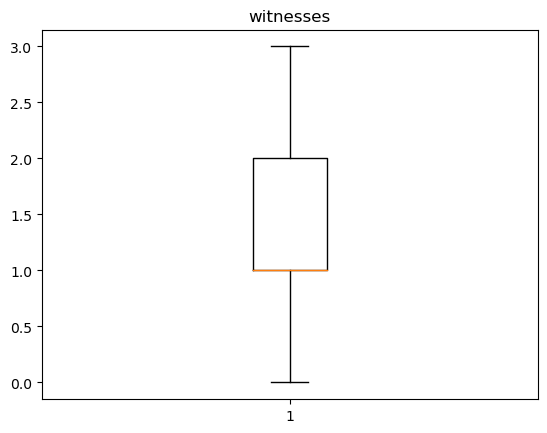

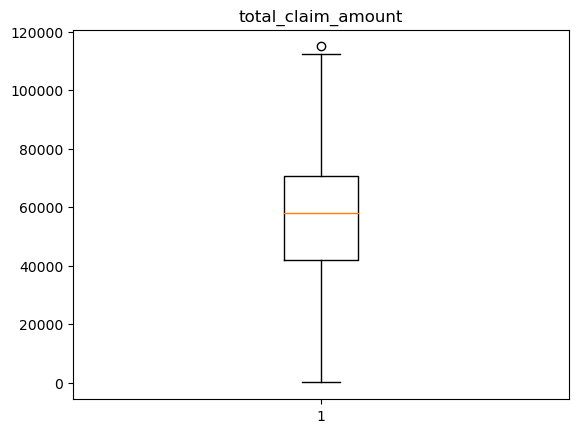

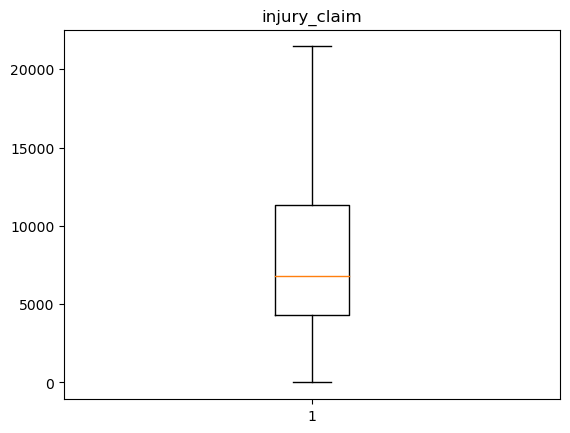

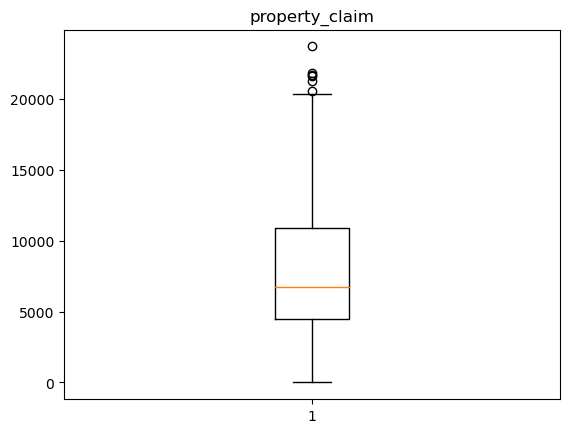

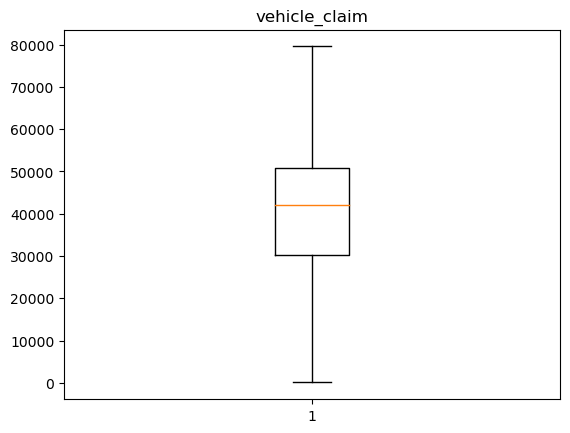

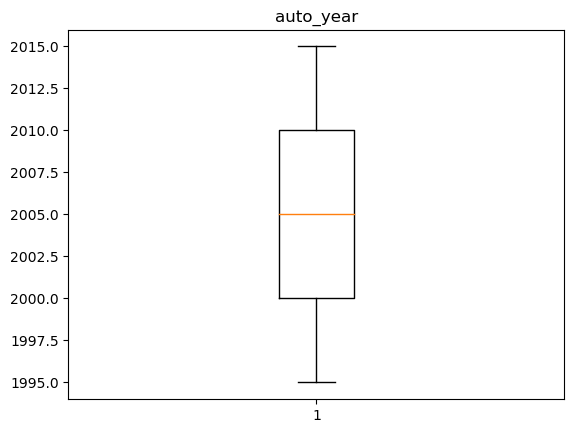

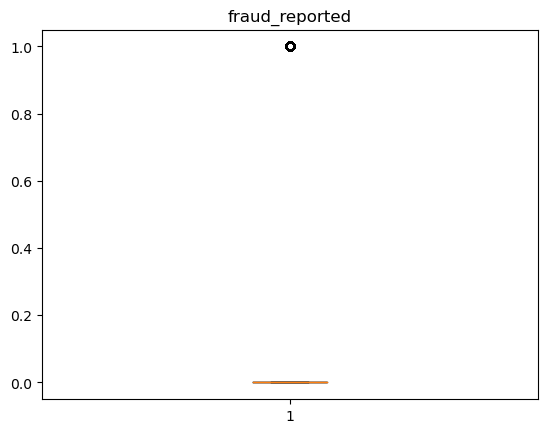

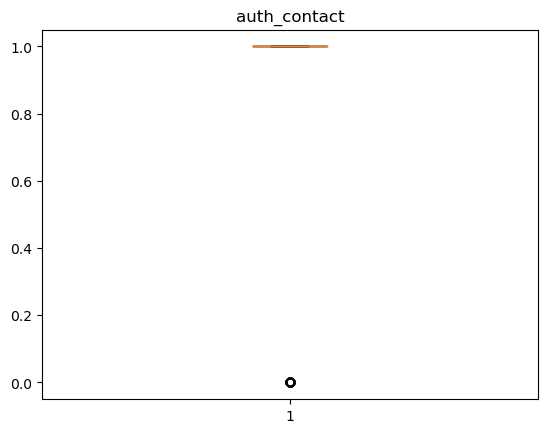

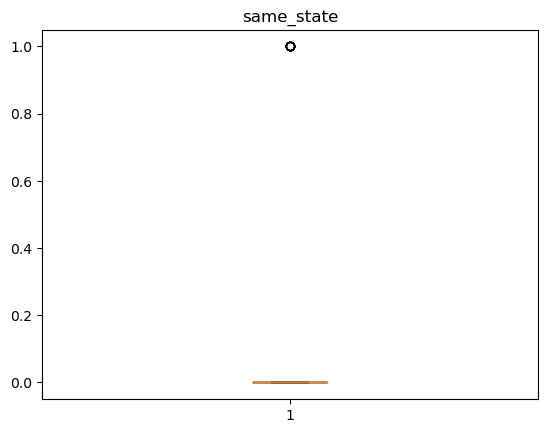

In [29]:
#Box Plots to look for interesting relationships and outliers.
for i in quant_cols:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

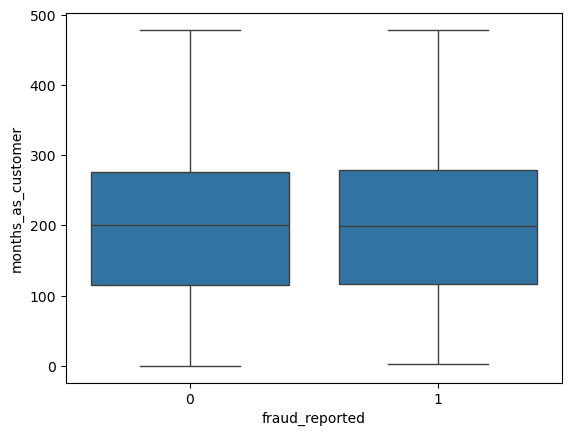

In [30]:
ax=sns.boxplot(x="fraud_reported", y="months_as_customer", data=df)

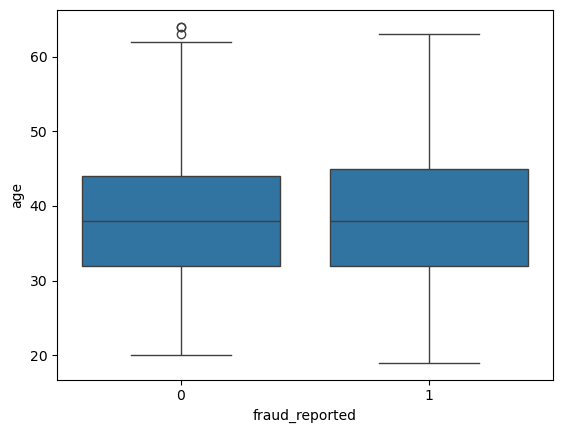

In [31]:
ax=sns.boxplot(x="fraud_reported", y="age", data=df)

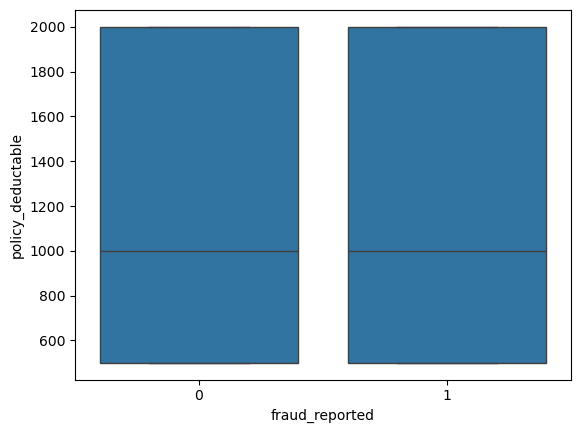

In [32]:
ax=sns.boxplot(x="fraud_reported", y="policy_deductable", data=df)

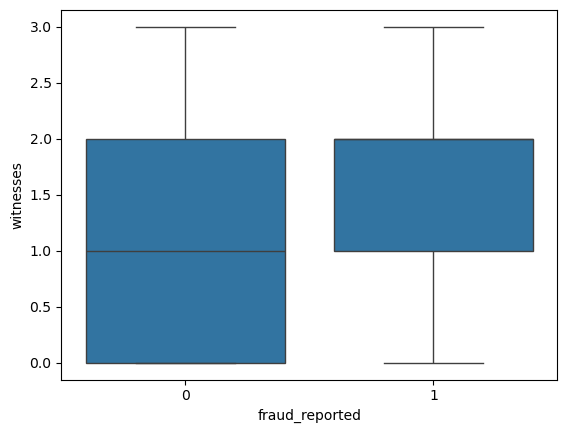

In [33]:
ax=sns.boxplot(x="fraud_reported", y="witnesses", data=df)

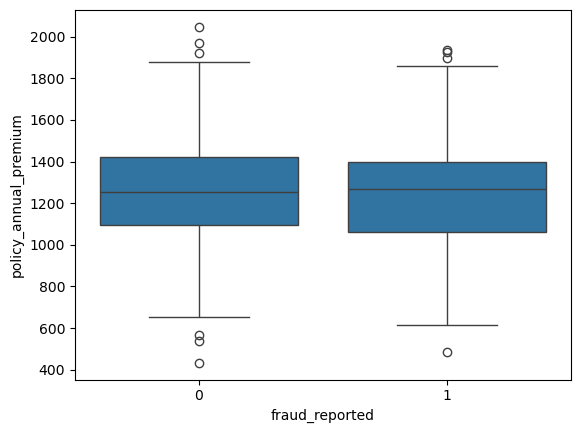

In [34]:
ax=sns.boxplot(x="fraud_reported", y="policy_annual_premium", data=df)

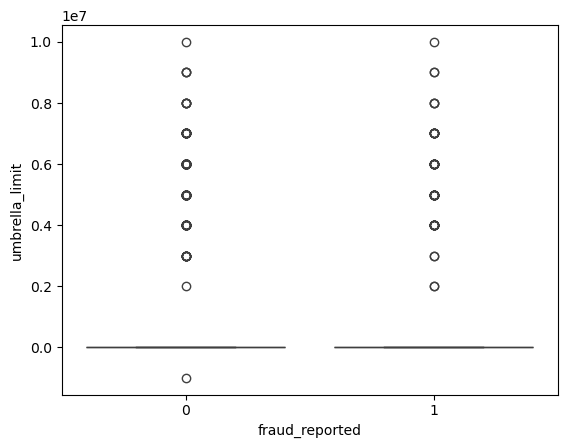

In [35]:
ax=sns.boxplot(x="fraud_reported", y="umbrella_limit", data=df)

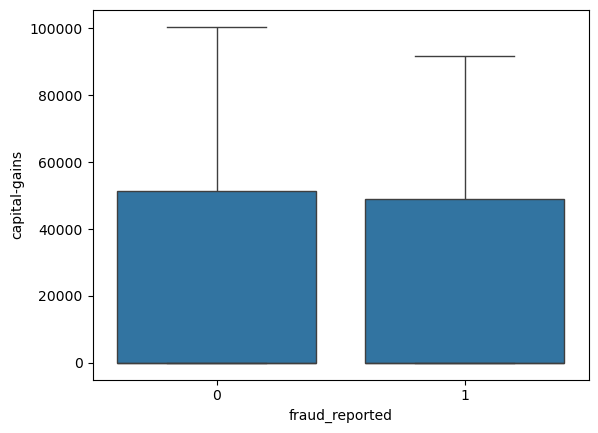

In [36]:
ax=sns.boxplot(x="fraud_reported", y="capital-gains", data=df)

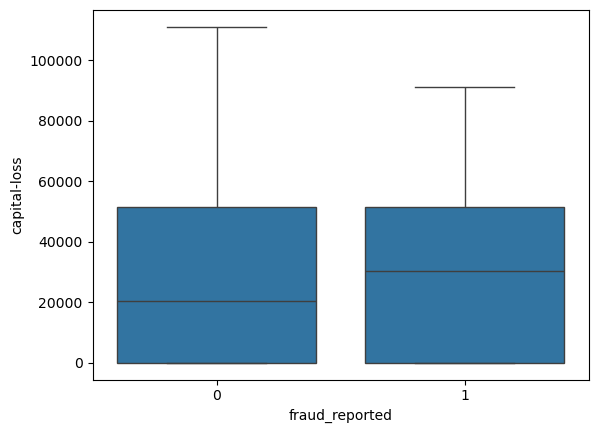

In [37]:
ax=sns.boxplot(x="fraud_reported", y="capital-loss", data=df)

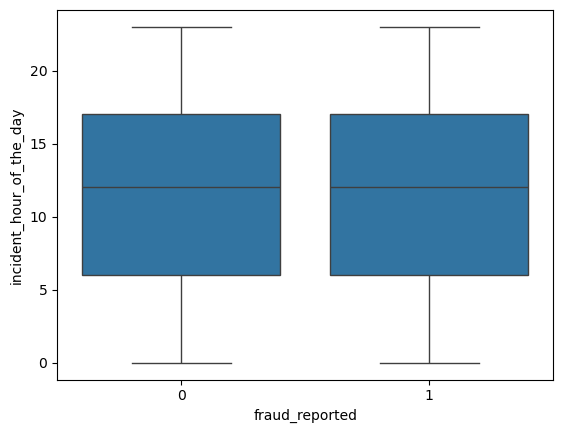

In [38]:
ax=sns.boxplot(x="fraud_reported", y="incident_hour_of_the_day", data=df)

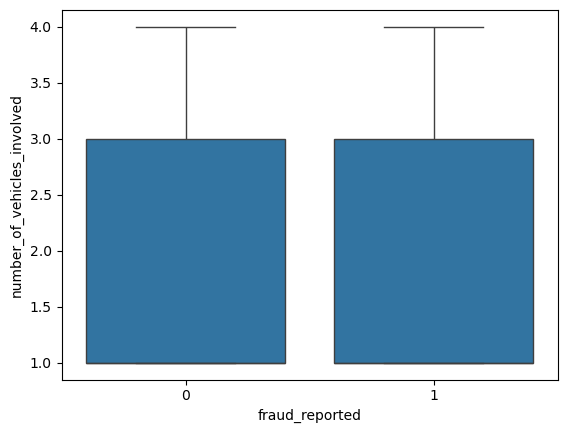

In [39]:
ax=sns.boxplot(x="fraud_reported", y="number_of_vehicles_involved", data=df)

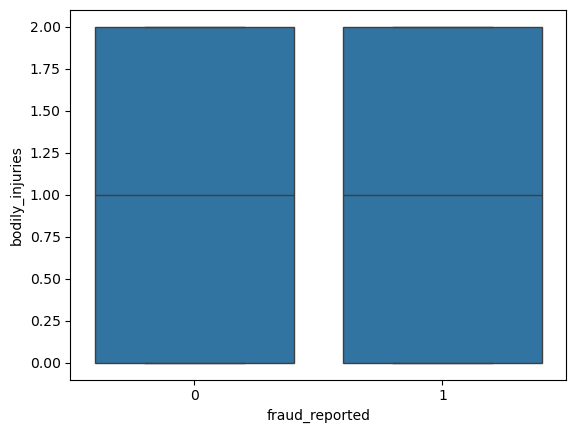

In [40]:
ax=sns.boxplot(x="fraud_reported", y="bodily_injuries", data=df)

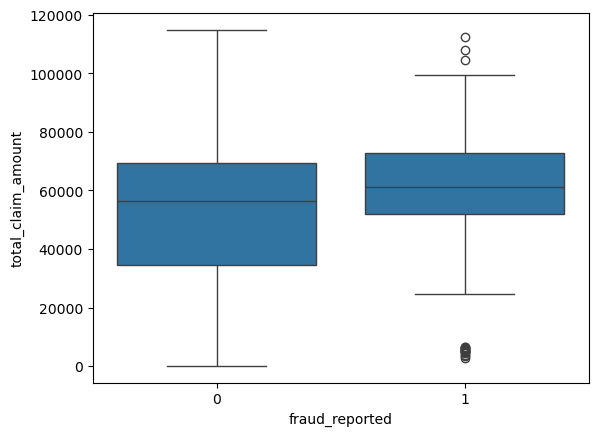

In [41]:
ax=sns.boxplot(x="fraud_reported", y="total_claim_amount", data=df)

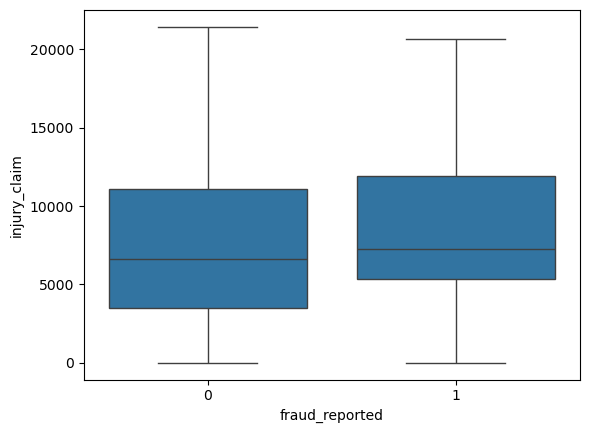

In [42]:
ax=sns.boxplot(x="fraud_reported", y="injury_claim", data=df)

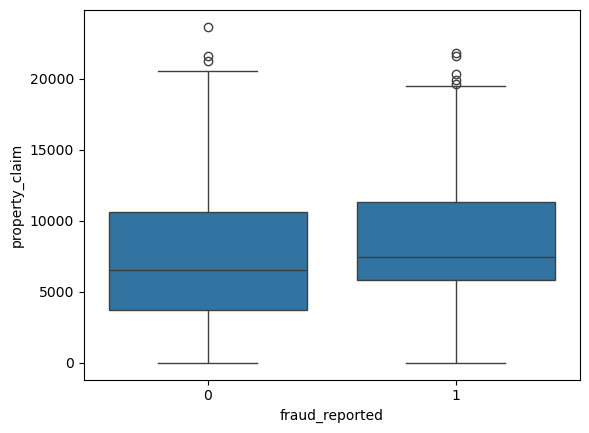

In [43]:
ax=sns.boxplot(x="fraud_reported", y="property_claim", data=df)

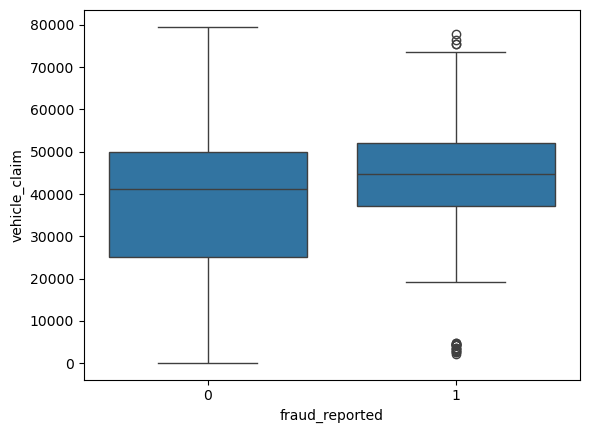

In [44]:
ax=sns.boxplot(x="fraud_reported", y="vehicle_claim", data=df)

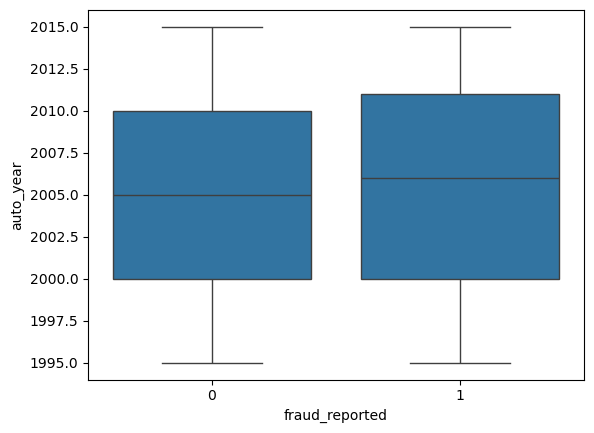

In [45]:
ax=sns.boxplot(x="fraud_reported", y="auto_year", data=df)

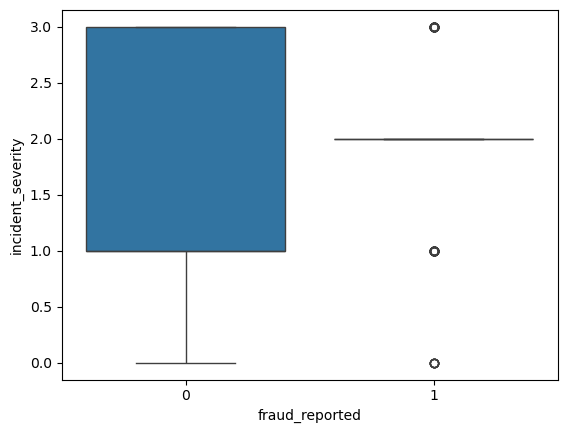

In [46]:
ax=sns.boxplot(x="fraud_reported", y="incident_severity", data=df)

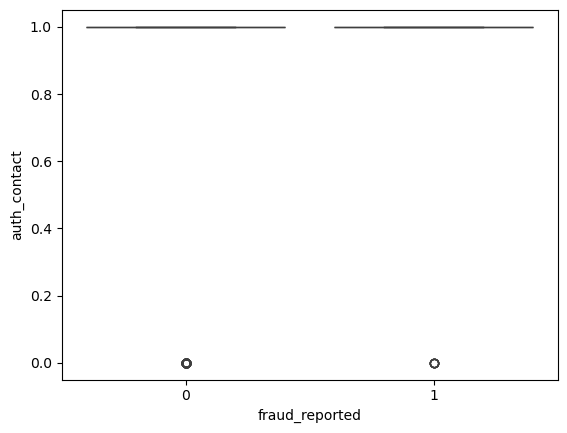

In [47]:
ax=sns.boxplot(x="fraud_reported", y="auth_contact", data=df)

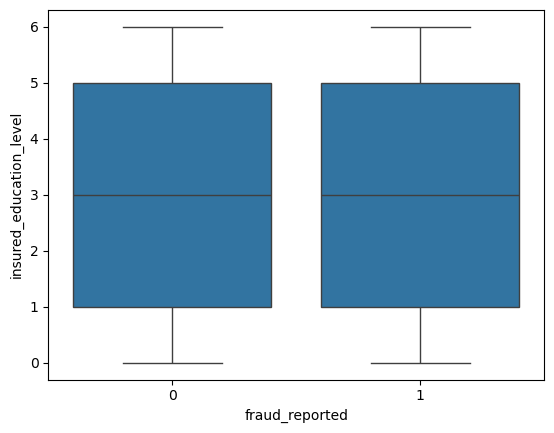

In [48]:
ax=sns.boxplot(x="fraud_reported", y="insured_education_level", data=df)

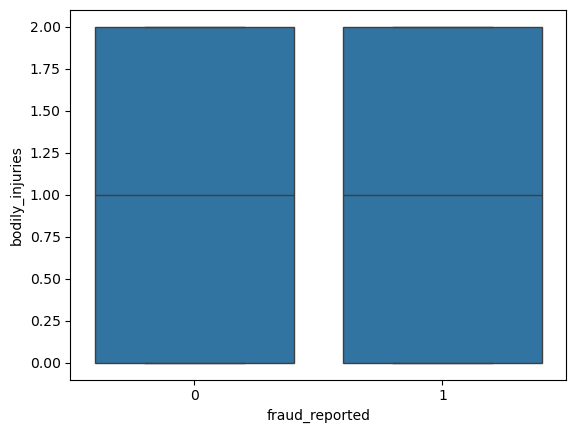

In [49]:
ax=sns.boxplot(x="fraud_reported", y="bodily_injuries", data=df)

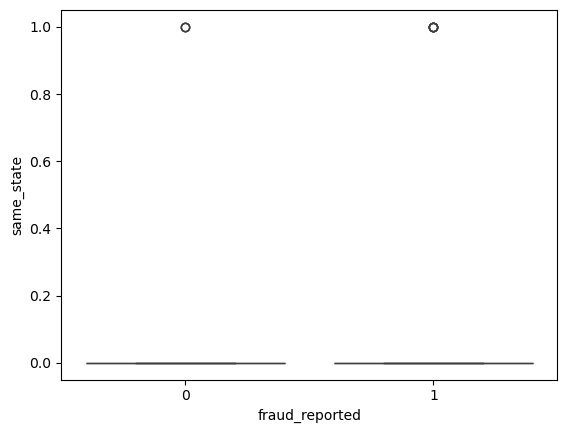

In [50]:
ax=sns.boxplot(x="fraud_reported", y="same_state", data=df)

In [51]:
#Looking for interesting relationships

Text(0.5, 1.0, 'Fraud Reported vs Insured Sex')

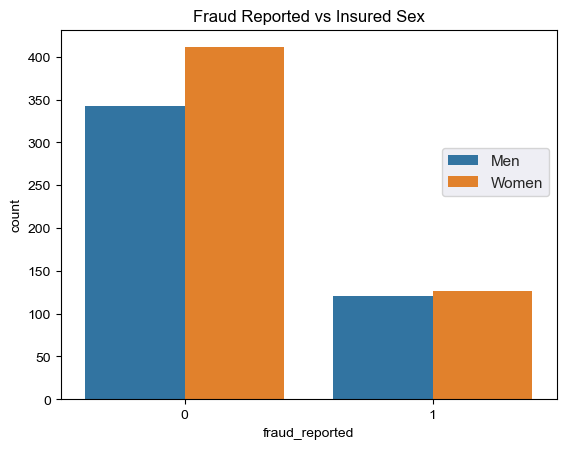

In [52]:
sns.countplot(x='fraud_reported',hue='insured_sex',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.legend(['Men', 'Women'], bbox_to_anchor=(1.0, 0.7))
plt.title("Fraud Reported vs Insured Sex")

Text(0.5, 1.0, 'Fraud Reported vs Insured Occupation')

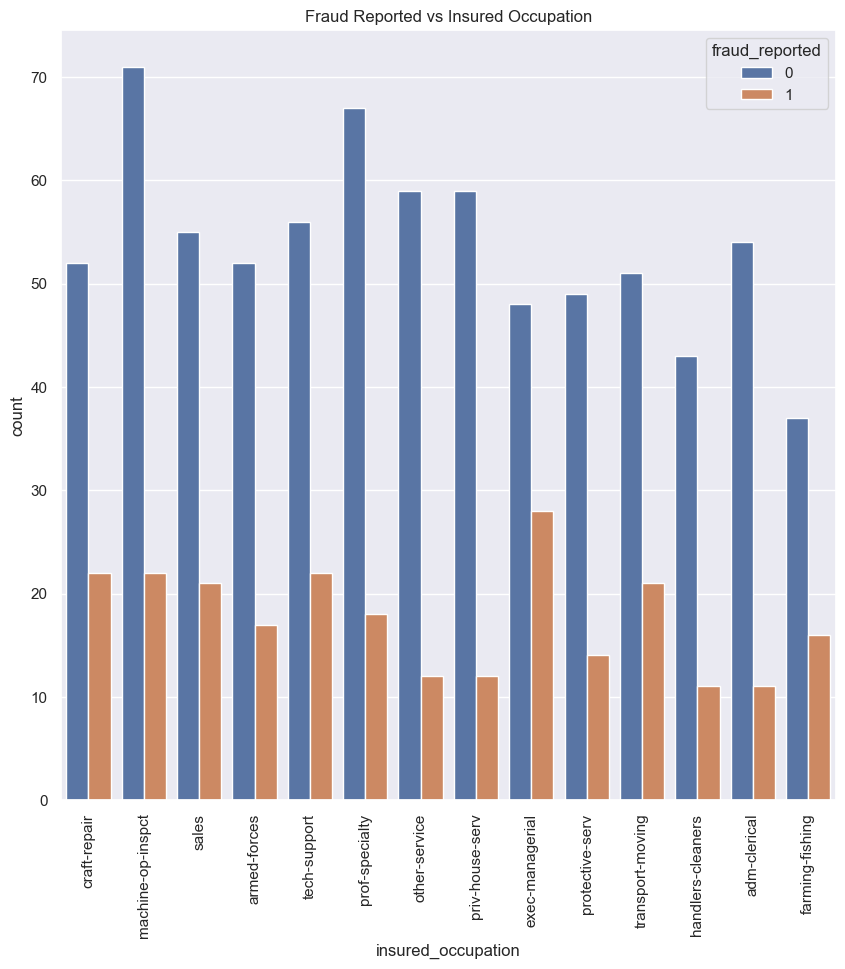

In [53]:
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title("Fraud Reported vs Insured Occupation")

Text(0.5, 1.0, 'Fraud Reported vs Insured Occupation')

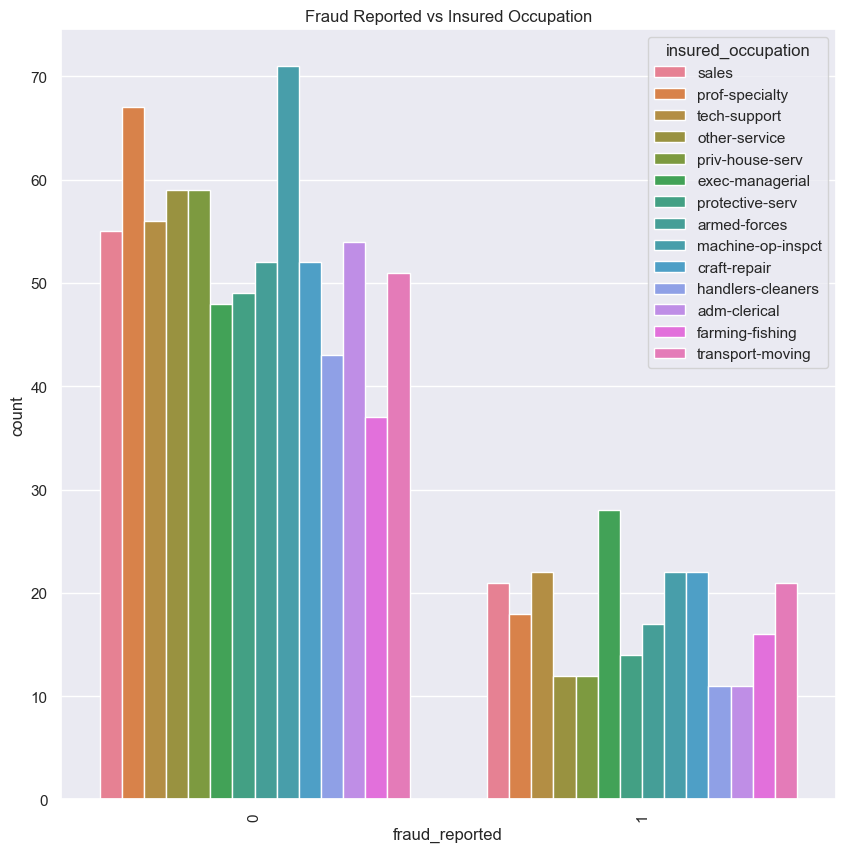

In [54]:
sns.countplot(x='fraud_reported',hue='insured_occupation',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title("Fraud Reported vs Insured Occupation")

Text(0.5, 1.0, 'Fraud Reported vs Insured Hobbies')

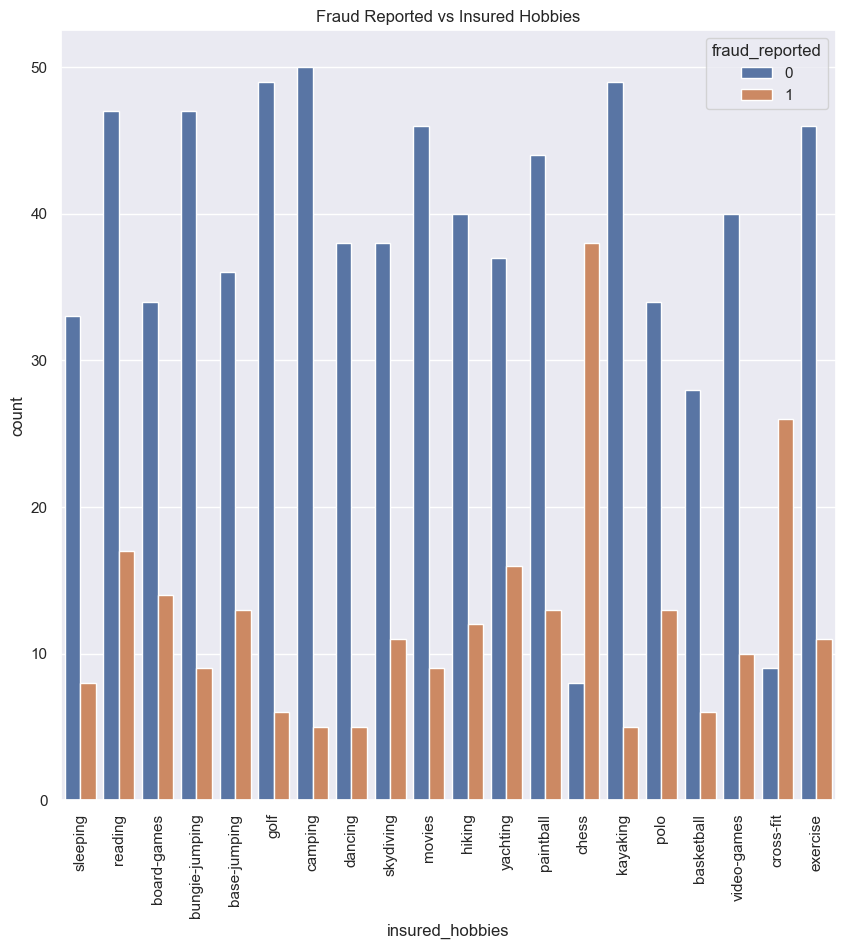

In [55]:
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
sns.set(rc={'figure.figsize':(2,2)})
plt.xticks(rotation=90)
plt.title("Fraud Reported vs Insured Hobbies")

Text(0.5, 1.0, 'Fraud Reported vs Insured Relationship')

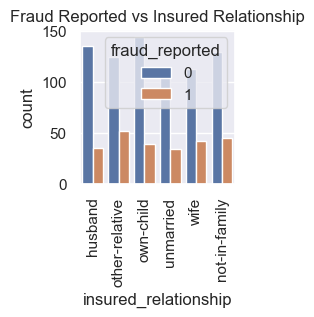

In [56]:
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=90)
plt.title("Fraud Reported vs Insured Relationship")

Text(0.5, 1.0, 'Fraud Reported vs Incident Type')

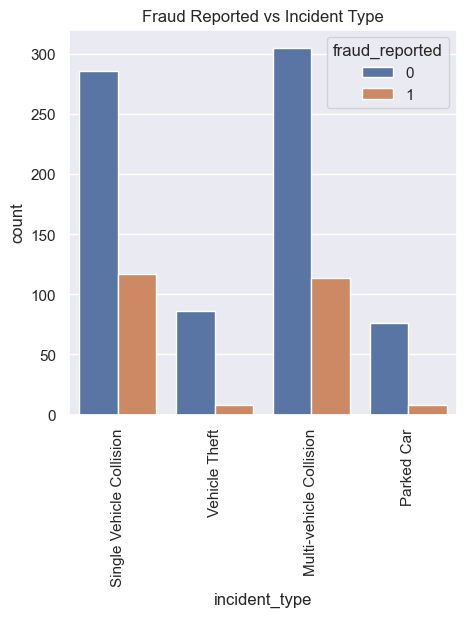

In [57]:
sns.countplot(x='incident_type',hue='fraud_reported',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=90)
plt.title("Fraud Reported vs Incident Type")

Text(0.5, 1.0, 'Fraud Reported vs Collision Type')

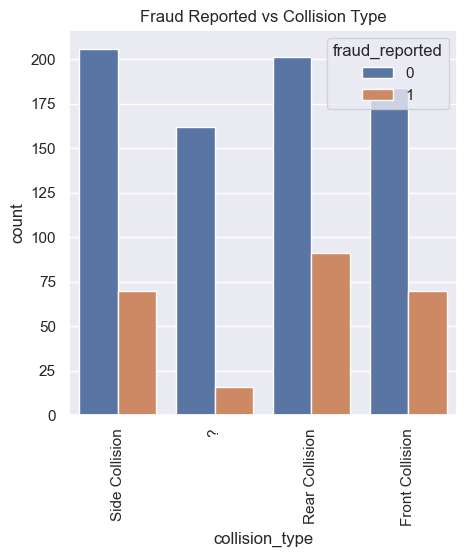

In [58]:
sns.countplot(x='collision_type',hue='fraud_reported',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=90)
plt.title("Fraud Reported vs Collision Type")

Text(0.5, 1.0, 'Fraud Reported vs Auto Make')

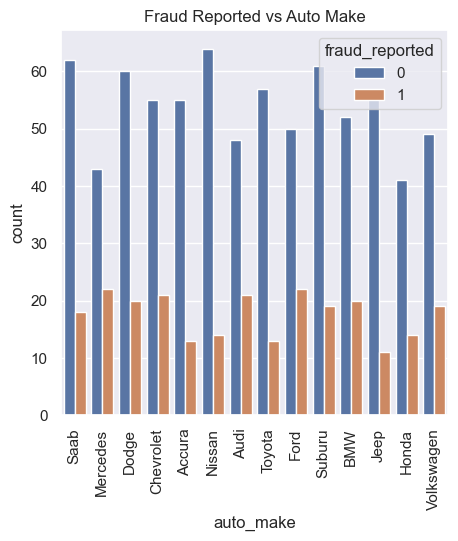

In [59]:
sns.countplot(x='auto_make',hue='fraud_reported',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=90)
plt.title("Fraud Reported vs Auto Make")

Text(0.5, 1.0, 'Fraud Reported vs Incident Severity')

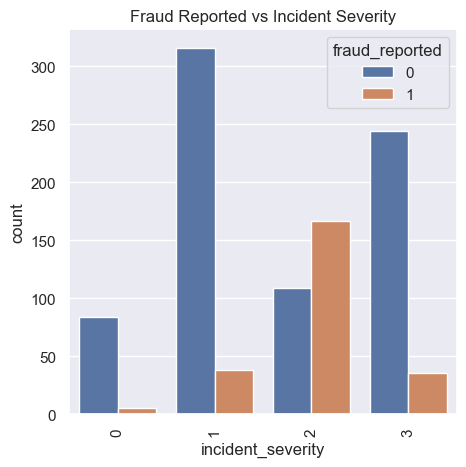

In [60]:
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=90)
plt.title("Fraud Reported vs Incident Severity")

Text(0.5, 1.0, 'Fraud Reported vs Education Level')

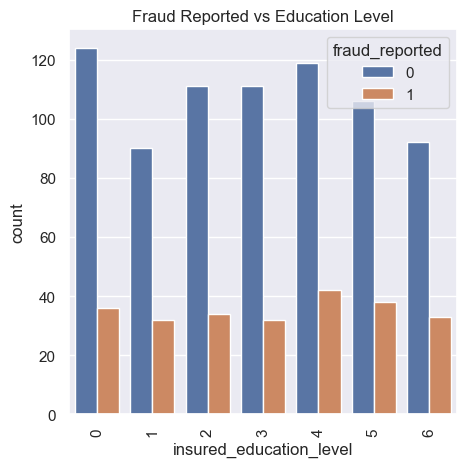

In [61]:
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=90)
plt.title("Fraud Reported vs Education Level")

Text(0.5, 1.0, 'Fraud Reported vs Number of Witnesses')

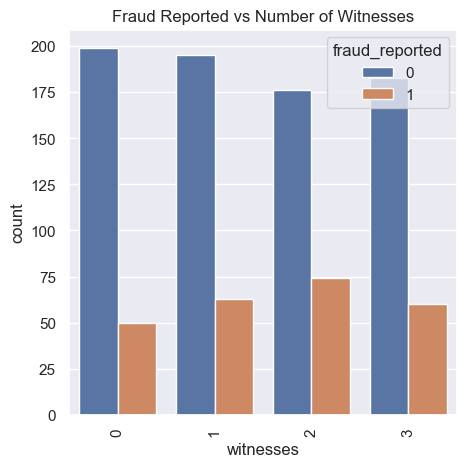

In [62]:
sns.countplot(x='witnesses',hue='fraud_reported',data=df)
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=90)
plt.title("Fraud Reported vs Number of Witnesses")

In [63]:
#Using Binning to make the continuous data categorical

In [64]:
df["months_as_customer"] = pd.cut(df["months_as_customer"], bins=5, labels=[0, 1, 2, 3, 4])
df["age"] = pd.cut(df["age"], bins=5, labels=[0, 1, 2, 3, 4])
df["policy_annual_premium"] = pd.cut(df["policy_annual_premium"], bins=5, labels=[0, 1, 2, 3, 4])
df["capital-gains"] = pd.cut(df["capital-gains"], bins=5, labels=[0, 1, 2, 3, 4])
df["capital-loss"] = pd.cut(df["capital-loss"], bins=5, labels=[0, 1, 2, 3, 4])
df["total_claim_amount"] = pd.cut(df["total_claim_amount"], bins=5, labels=[0, 1, 2, 3, 4])
df["injury_claim"] = pd.cut(df["injury_claim"], bins=5, labels=[0, 1, 2, 3, 4])
df["property_claim"] = pd.cut(df["property_claim"], bins=5, labels=[0, 1, 2, 3, 4])
df["vehicle_claim"] = pd.cut(df["vehicle_claim"], bins=5, labels=[0, 1, 2, 3, 4])

In [65]:
#Feature Scaling

In [66]:
min_max=MinMaxScaler()
numeric_columns=cols = ['policy_annual_premium', 'auto_year', 'bodily_injuries', 'auth_contact', 'witnesses', 'insured_sex', 'insured_education_level', 'months_as_customer','policy_deductable', 'age', 'umbrella_limit', 'incident_severity', 'capital-gains', 'capital-loss', 'total_claim_amount', 'incident_hour_of_the_day', 'injury_claim', 'property_claim', 'vehicle_claim', 'number_of_vehicles_involved']

In [67]:
df[numeric_columns] = min_max.fit_transform(df[numeric_columns])

In [68]:
print('Training Features Shape: ', df.shape)

Training Features Shape:  (1000, 31)


In [69]:
#Converting categorical data into numerical data

In [70]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

In [71]:
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

In [72]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

In [73]:
df_encoded =pd.concat([df, one_hot_df], axis=1)

In [74]:
df=df_encoded.drop(categorical_columns, axis=1)

In [75]:
#Split the Data

In [76]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
#Balance the Data

In [79]:
y_train.value_counts()

0.0    744
1.0     56
Name: auto_make_Volkswagen, dtype: int64

In [80]:
sm=SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [81]:
y_train.value_counts()

0.0    744
1.0    744
Name: auto_make_Volkswagen, dtype: int64

In [82]:
enn = EditedNearestNeighbours()
X_train, y_train = enn.fit_resample(X_train, y_train)

In [83]:
y_train.value_counts()

0.0    744
1.0    744
Name: auto_make_Volkswagen, dtype: int64

In [84]:
#Develop the Models

In [85]:
# 1) Naive Bayes (Categorical)

In [85]:
cnb=CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

In [86]:
y_pred_cnb=cnb.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred_cnb))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       188
         1.0       0.00      0.00      0.00        12

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.88      0.94      0.91       200



C:\Users\carol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
acc_cnb=metrics.accuracy_score(y_test, y_pred_cnb)

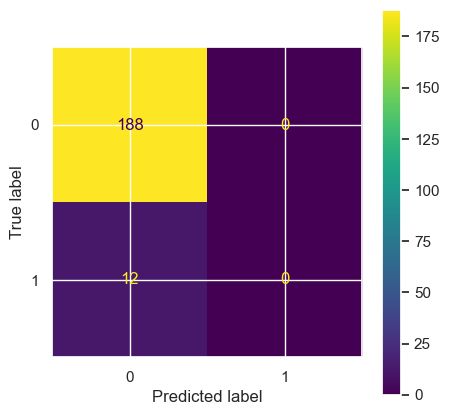

In [89]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_cnb, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [90]:
#cross validation of CNB model
cross_val_results = cross_val_score(cnb, X_train, y_train, cv=10)

In [91]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.67785235 1.         0.98657718 1.         1.         1.
 1.         1.         1.         1.        ]
Mean Accuracy: 0.9664429530201343


In [93]:
cnb_mean_cv_acc=cross_val_results.mean()

In [140]:
auc_cnb=metrics.roc_auc_score(y_test, y_pred_cnb)
print(auc_cnb)

0.5


In [94]:
# 2) SVC Model

In [95]:
svc=SVC()
svc.fit(X_train, y_train)

SVC()

In [96]:
y_pred_svc=svc.predict(X_test)

In [97]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       188
         1.0       0.00      0.00      0.00        12

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.88      0.94      0.91       200



C:\Users\carol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
cross_val_results = cross_val_score(svc, X_train, y_train, cv=10)

In [99]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.98657718 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean Accuracy: 0.9986577181208054


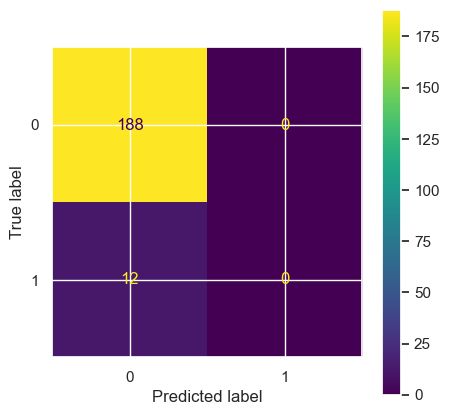

In [100]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_svc, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [101]:
#Hyperparameter Tuning for SVC

In [103]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.983 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [104]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [105]:
print(grid.best_estimator_) 

SVC(C=0.1, gamma=1, kernel='linear')


In [102]:
svc = SVC(C=0.1, gamma=1, kernel="linear")
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [103]:
y_pred_svc=svc.predict(X_test)

In [104]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       188
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [105]:
acc_svc=metrics.accuracy_score(y_test, y_pred_svc)

In [106]:
auc_svc=metrics.roc_auc_score(y_test, y_pred_svc)
print(auc_svc)

1.0


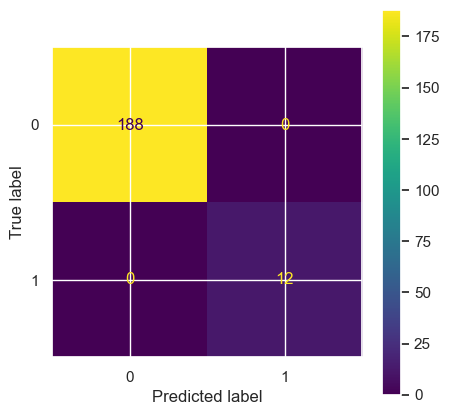

In [107]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_svc, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [108]:
# 3) MLP Model
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [113]:
y_pred_mlp=mlp.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       185
         1.0       1.00      0.87      0.93        15

    accuracy                           0.99       200
   macro avg       0.99      0.93      0.96       200
weighted avg       0.99      0.99      0.99       200



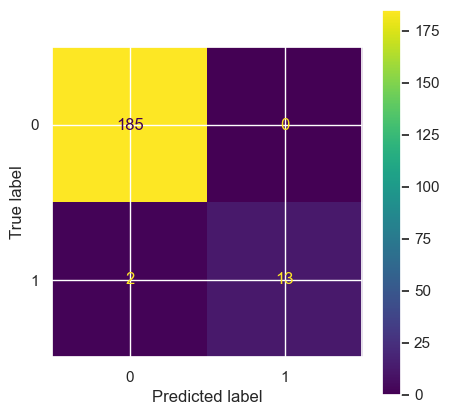

In [115]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_mlp, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [116]:
#Hyperparameter Tuning
param_grid = {
    'max_iter' :[500, 800],
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [117]:
grid = GridSearchCV(mlp, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=1.000 total time=   4.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=1.000 total time=   4.9s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=1.000 total time=   4.7s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=1.000 total time=   4.5s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=1.000 total time=   4.4s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.997 to

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   6.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   5.7s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   5.4s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   5.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   4.8s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.5s
[CV 2/5] END activation=tanh, alpha=0.0001, h

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.983 total time=   3.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.980 total time=   3.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.936 total time=   3.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.953 total time=   4.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.966 total time=   4.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.9s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=1.000 total time=   6.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.997 total time=   6.4s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.987 total time=   6.6s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.990 total time=   6.4s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=1.000 total time=   6.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.977 total time=   5.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.987 total time=   5.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.936 total time=   7.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.963 total time=   6.8s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.970 total time=   6.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.8s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.7s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.7s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.4s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=1.000 total time=  12.1s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=1.000 total time=  10.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.980 total time=  10.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.997 total time=  10.8s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.997 total time=  11.8s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.4s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), le

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.977 total time=   3.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.977 total time=   4.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.936 total time=   5.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.953 total time=   5.6s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.963 total time=   5.5s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.2s
[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.2s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.3s
[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.6s
[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.5s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=1.000 total time=   7.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.997 total time=   7.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.987 total time=   6.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.997 total time=   6.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=1.000 total time=   6.2s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.2s
[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.1s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.4s
[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.1s
[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.1s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.973 total time=   3.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.967 total time=   4.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.933 total time=   3.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.943 total time=   5.4s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.960 total time=   3.3s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.8s
[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.8s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.8s
[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.9s
[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.1s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=1.000 total time=   6.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=1.000 total time=   5.5s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.983 total time=   5.4s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.997 total time=   5.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=1.000 total time=   5.4s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   0.9s
[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=1.000 total time=   5.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=1.000 total time=   4.2s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.987 total time=   4.5s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.997 total time=   4.8s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.997 total time=   4.5s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.4s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.993 total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.0001,

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   4.6s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.990 total time=   5.4s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.987 total time=   5.1s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   4.6s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   4.4s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.3s
[CV 5/5] END activation=relu, alpha=0.0001

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.987 total time=   5.5s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.997 total time=   5.4s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.997 total time=   5.8s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.4s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.997 total time=   0.4s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.4s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.4s
[CV 1/5] END activation=relu, alpha

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   6.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   5.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.990 total time=   6.7s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   8.5s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.993 total time=   6.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.993 total time=   0.4s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.993 total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.4s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.997 total time=   0.4s
[CV 1/5] END activation=relu, alpha

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.970 total time=   3.6s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.980 total time=   4.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.946 total time=   3.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.957 total time=   3.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.977 total time=   3.6s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.8s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.997 total time=   5.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.997 total time=   5.5s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.977 total time=   6.5s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.987 total time=   5.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.993 total time=   6.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   0.8s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   0.7s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   0.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.973 total time=   3.6s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.977 total time=   3.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.936 total time=   3.5s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.960 total time=   3.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.980 total time=   3.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.9s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.8s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.8s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.8s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.8s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.990 total time=   5.8s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.993 total time=   5.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.973 total time=   5.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.990 total time=   6.1s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.993 total time=   5.6s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   0.7s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   0.7s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   0.7s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   0.9s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   0.9s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), le

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.993 total time=   5.4s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.993 total time=   5.1s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.993 total time=   5.5s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=1.000 total time=   4.1s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.6s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.5s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_s

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.993 total time=   4.5s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.993 total time=   4.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.993 total time=   4.9s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.997 total time=   5.2s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.997 total time=   7.8s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.7s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.7s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.997 total time=   0.7s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.7s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.6s
[CV 1/5] END activation=relu, alpha=0.05, hidden_laye

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=1.000 total time=   7.4s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.4s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.0s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.1s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.1s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.3s
[CV 1/5] END activation=relu, alpha=0.05, hidde

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   5.8s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   5.8s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.993 total time=   6.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.997 total time=   6.3s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=1.000 total time=   6.8s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.1s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.0s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.2s
[CV 5/5] END activation=relu, alpha=0.05, hidden

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.963 total time=   4.5s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.963 total time=   4.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.943 total time=   3.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.960 total time=   5.4s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.977 total time=   4.8s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.1s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.0s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   1.0s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.9s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam;, score=1.000 total time=   0.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.990 total time=   5.5s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.993 total time=   5.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.973 total time=   5.8s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=0.993 total time=   6.4s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=sgd;, score=1.000 total time=   6.0s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   0.9s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   0.9s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.963 total time=   3.6s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.970 total time=   4.1s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.926 total time=   3.7s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.963 total time=   3.6s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.980 total time=   4.4s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   0.9s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.9s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.1s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam;, score=1.000 total time=   1.2s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.990 total time=   6.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.990 total time=   6.2s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.983 total time=   7.0s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.993 total time=   8.3s


C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.997 total time=   7.8s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.1s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.4s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.0s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   1.0s


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [500, 800], 'solver': ['sgd', 'adam']},
             verbose=3)

In [118]:
print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}


In [109]:
mlp = MLPClassifier(max_iter=500, activation="tanh", alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate="constant", solver="sgd")
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50, 50), max_iter=500,
              solver='sgd')

In [110]:
y_pred_mlp=mlp.predict(X_test)

In [111]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       188
         1.0       1.00      0.83      0.91        12

    accuracy                           0.99       200
   macro avg       0.99      0.92      0.95       200
weighted avg       0.99      0.99      0.99       200



In [112]:
acc_mlp=metrics.accuracy_score(y_test, y_pred_mlp)

In [113]:
auc_mlp=metrics.roc_auc_score(y_test, y_pred_mlp)
print(auc_mlp)

0.9166666666666667


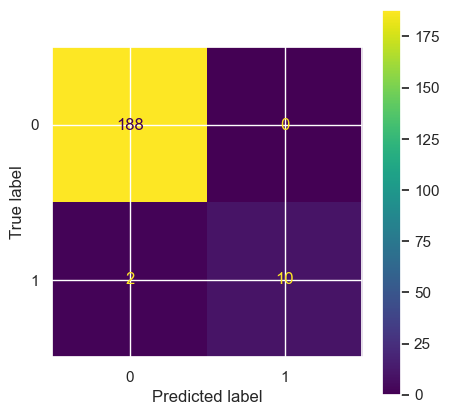

In [114]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_mlp, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [115]:
# 4) Decision Tree

In [126]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [127]:
plt.figure(figsize=(12,12)) 

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

[Text(0.5425237341772152, 0.9772727272727273, 'x[8] <= 0.0\ngini = 0.5\nsamples = 1494\nvalue = [747, 747]'),
 Text(0.2986550632911392, 0.9318181818181818, 'x[38] <= 0.008\ngini = 0.322\nsamples = 480\nvalue = [383, 97]'),
 Text(0.21123417721518986, 0.8863636363636364, 'x[3] <= 0.503\ngini = 0.251\nsamples = 428\nvalue = [365, 63]'),
 Text(0.1360759493670886, 0.8409090909090909, 'x[7] <= 0.776\ngini = 0.103\nsamples = 275\nvalue = [260, 15]'),
 Text(0.0949367088607595, 0.7954545454545454, 'x[44] <= 0.5\ngini = 0.073\nsamples = 264\nvalue = [254, 10]'),
 Text(0.05063291139240506, 0.75, 'x[34] <= 0.216\ngini = 0.04\nsamples = 248\nvalue = [243, 5]'),
 Text(0.02531645569620253, 0.7045454545454546, 'x[18] <= 0.975\ngini = 0.017\nsamples = 231\nvalue = [229, 2]'),
 Text(0.012658227848101266, 0.6590909090909091, 'gini = 0.0\nsamples = 222\nvalue = [222, 0]'),
 Text(0.0379746835443038, 0.6590909090909091, 'x[4] <= 0.318\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.02531645569620253, 

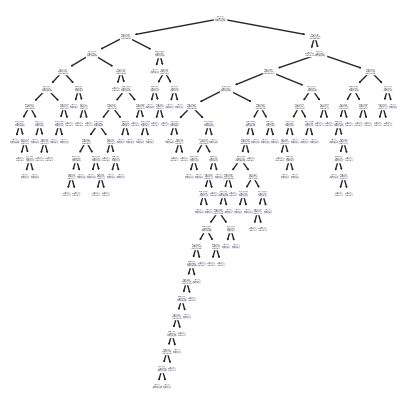

In [128]:
tree.plot_tree(dt)

In [129]:
y_pred_dt = dt.predict(X_test)

In [130]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       185
         1.0       0.00      0.00      0.00        15

    accuracy                           0.83       200
   macro avg       0.46      0.45      0.45       200
weighted avg       0.85      0.83      0.84       200



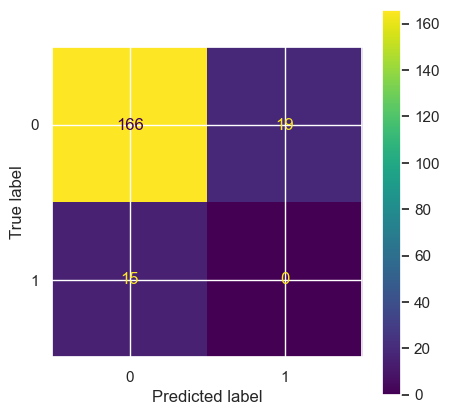

In [131]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_dt, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [132]:
#Hyperparameter Tuning

In [133]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [134]:
grid = GridSearchCV(dt, param_grid, n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [135]:
print(grid.best_params_) 

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [116]:
dt=DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5)

In [117]:
y_pred_dt = dt.predict(X_test)

In [118]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       188
         1.0       0.00      0.00      0.00        12

    accuracy                           0.83       200
   macro avg       0.47      0.44      0.46       200
weighted avg       0.88      0.83      0.86       200



In [119]:
acc_dt=metrics.accuracy_score(y_test, y_pred_dt)

In [120]:
auc_dt=metrics.roc_auc_score(y_test, y_pred_dt)
print(auc_dt)

0.4441489361702128


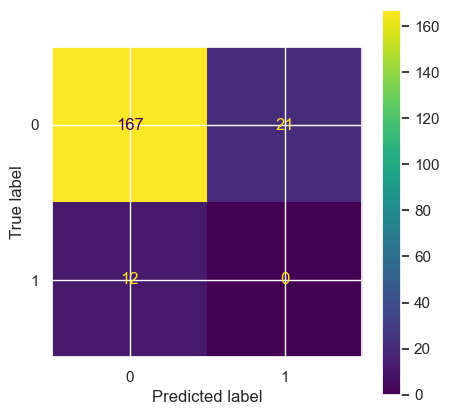

In [121]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_dt, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [142]:
# 5) LSTM

In [143]:
model = Sequential()

In [144]:
print(X_train.shape , y_train.shape)

(1494, 94) (1494,)


In [141]:
#param_grid = {'neurons': [8, 16, 32, 64, 128],
 #           'optimizer': ['SGD', 'RMSprop', 'Adam'],
  #          'activation':['relu', 'tanh', 'sigmoid', 'linear','swish']}

In [142]:
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
#grid_search_result = grid_search.fit(X_train, y_train)

In [145]:
X_train_lstm = X_train.values.reshape(1494, 94, 1)
X_train_lstm.shape

(1494, 94, 1)

In [146]:
model = Sequential()

model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(94, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [147]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 94, 128)           66560     
                                                                 
 dense (Dense)               (None, 94, 64)            8256      
                                                                 
 dense_1 (Dense)             (None, 94, 32)            2080      
                                                                 
 dense_2 (Dense)             (None, 94, 1)             33        
                                                                 
Total params: 76929 (300.50 KB)
Trainable params: 76929 (300.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [149]:
model.fit(X_train_lstm, y_train)

47/47 [==============================] - 7s 68ms/step - loss: 0.6934 - accuracy: 0.4927


In [150]:
y_pred_lstm = model.predict(X_test)

7/7 [==============================] - 0s 26ms/step


In [151]:
model.save('LSTM.p5')

INFO:tensorflow:Assets written to: LSTM.p5\assets


INFO:tensorflow:Assets written to: LSTM.p5\assets


In [152]:
# model evaluation
from keras.models import load_model

model = load_model('LSTM.p5')
scores = model.evaluate(X_test, y_test)

acc_lstm = scores[1]

print('Test accuracy: ', scores[1])

7/7 [==============================] - 0s 26ms/step - loss: 0.6888 - accuracy: 0.9077
Test accuracy:  0.9076595902442932


In [154]:
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model.predict(X_test)

#Create confusion matrix and normalizes it over predicted (columns)
#result = confusion_matrix(y_test, y_prediction , normalize='pred')

7/7 [==============================] - 0s 26ms/step


ValueError: Classification metrics can't handle a mix of binary and unknown targets

In [155]:
#auc_lstm=metrics.roc_auc_score(y_test, y_prediction)
#print(auc_lstm)

ValueError: Found array with dim 3. None expected <= 2.

In [156]:
# 6) KNN

In [122]:
#using cross validation to find best value for k
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

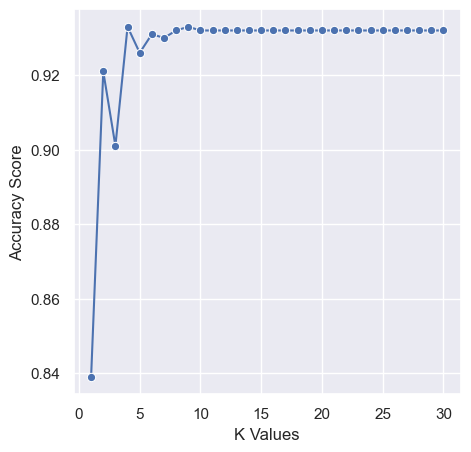

In [123]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [124]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [125]:
best_k

4

In [126]:
knn = KNeighborsClassifier(n_neighbors=4)

In [127]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [128]:
y_pred_knn = knn.predict(X_test)

In [129]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.96      0.34      0.50       188
         1.0       0.07      0.75      0.12        12

    accuracy                           0.36       200
   macro avg       0.51      0.55      0.31       200
weighted avg       0.90      0.36      0.48       200



In [130]:
acc_knn=metrics.accuracy_score(y_test, y_pred_knn)

In [131]:
auc_knn=metrics.roc_auc_score(y_test, y_pred_knn)
print(auc_knn)

0.5452127659574468


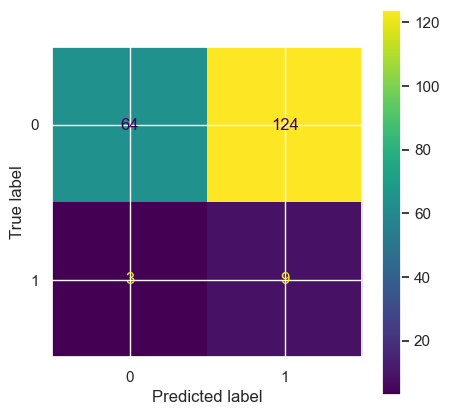

In [132]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_knn, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [168]:
# 7) Random Forest

In [169]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [170]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=150)


In [133]:
RF = RandomForestClassifier(max_depth=9, max_features="log2", max_leaf_nodes=9, n_estimators=150) 
RF.fit(X_train, y_train) 
y_pred_RF = RF.predict(X_test) 
print(classification_report(y_pred_RF, y_test)) 

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       196
         1.0       0.00      0.00      0.00         4

    accuracy                           0.92       200
   macro avg       0.49      0.47      0.48       200
weighted avg       0.96      0.92      0.94       200



In [134]:
acc_RF=metrics.accuracy_score(y_test, y_pred_RF)

In [135]:
auc_RF=metrics.roc_auc_score(y_test, y_pred_RF)
print(auc_RF)

0.48936170212765956


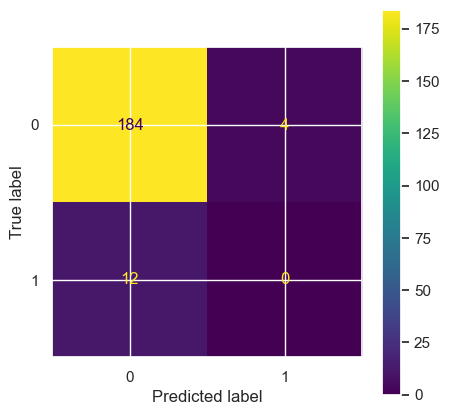

In [136]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_RF, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [137]:
#CrossVALIDATION
result = cross_val_score(RF, X_test, y_test, cv=10)
print(result)

[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.9  0.9 ]


In [176]:
#Summary of the individual models

Text(0.5, 1.0, 'Model accuracy')

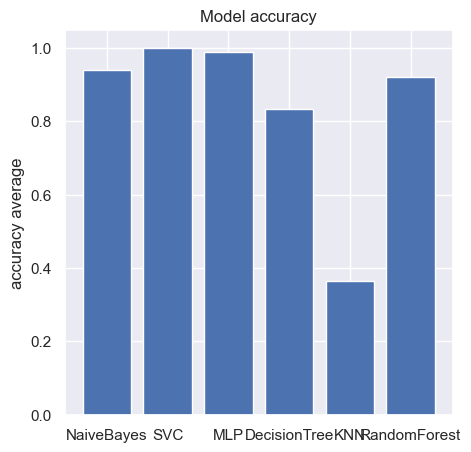

In [138]:
fig, ax = plt.subplots()

Models = ["NaiveBayes", "SVC", "MLP", "DecisionTree", "KNN", "RandomForest"]
counts = [acc_cnb, acc_svc, acc_mlp, acc_dt, acc_knn, acc_RF]

ax.bar(Models, counts)

ax.set_ylabel("accuracy average")
ax.set_title("Model accuracy")

Text(0.5, 1.0, 'Model AUC')

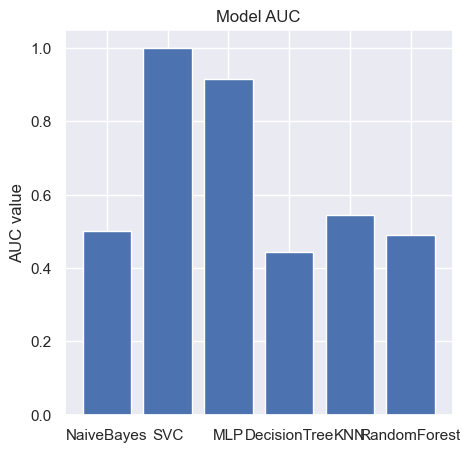

In [141]:
fig, ax = plt.subplots()

Models = ["NaiveBayes", "SVC", "MLP", "DecisionTree", "KNN", "RandomForest"]
counts = [auc_cnb, auc_svc, auc_mlp, auc_dt, auc_knn, auc_RF]

ax.bar(Models, counts)

ax.set_ylabel("AUC value")
ax.set_title("Model AUC")

In [181]:
#ENSEMBLE LEARNING

In [142]:
#Simple averaging
pred_final = ((acc_cnb + acc_svc + acc_mlp + acc_dt + acc_RF) / 5)
pred_final

0.9369999999999999

In [183]:
#BOOSTING

In [143]:
# boosting
ada = AdaBoostClassifier()

# training
ada.fit(X_train, y_train)

# prediction
prediction = ada.predict(X_test)

# evaluation
accuracy = round(accuracy_score(y_test, prediction) * 100, 3)
auc = round(roc_auc_score(y_test, prediction), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")

 Accuracy: 100.0%
 AUC score: 1.0


In [185]:
#Hyperparameter tuning
param_grid = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(ada, param_grid, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [186]:
print(grid_search.best_params_)

{'learning_rate': 0.1, 'n_estimators': 90}


In [144]:
ada = AdaBoostClassifier(learning_rate=0.00001, n_estimators=90)
ada.fit(X_train, y_train)
prediction = ada.predict(X_test)
accuracy = round(accuracy_score(y_test, prediction) * 100, 3)
auc = round(roc_auc_score(y_test, prediction), 3)
print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")

 Accuracy: 49.5%
 AUC score: 0.497


In [145]:
#Stacking and boosting
estimators = []
estimators.append(('CNB', CategoricalNB())) 
estimators.append(("MLP", MLPClassifier(max_iter=500, activation="tanh", alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate="constant", solver="sgd")))
estimators.append(("SVC", SVC(C=0.1, gamma=1, kernel="linear")))
estimators.append(("DT", DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5)))
#estimators.append(("KNN", KNeighborsClassifier(n_neighbors=8)))
estimators.append(("RFC", RandomForestClassifier(max_depth=9, max_features="log2", max_leaf_nodes=9, n_estimators=150)))

# building the level 1 model
ADA = AdaBoostClassifier(learning_rate=0.00001, n_estimators=90)

In [146]:
SC = StackingClassifier(estimators=estimators,final_estimator=ADA)

In [147]:
SC.fit(X_train, y_train)

StackingClassifier(estimators=[('CNB', CategoricalNB()),
                               ('MLP',
                                MLPClassifier(activation='tanh',
                                              hidden_layer_sizes=(50, 50, 50),
                                              max_iter=500, solver='sgd')),
                               ('SVC', SVC(C=0.1, gamma=1, kernel='linear')),
                               ('DT',
                                DecisionTreeClassifier(min_samples_split=5)),
                               ('RFC',
                                RandomForestClassifier(max_depth=9,
                                                       max_features='log2',
                                                       max_leaf_nodes=9,
                                                       n_estimators=150))],
                   final_estimator=AdaBoostClassifier(learning_rate=1e-05,
                                                      n_estimators=90))

In [148]:
prediction = SC.predict(X_test)

In [149]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       188
         1.0       1.00      0.83      0.91        12

    accuracy                           0.99       200
   macro avg       0.99      0.92      0.95       200
weighted avg       0.99      0.99      0.99       200



In [150]:
accuracy = round(accuracy_score(y_test, prediction) * 100, 3)
auc = round(roc_auc_score(y_test, prediction), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")

 Accuracy: 99.0%
 AUC score: 0.917


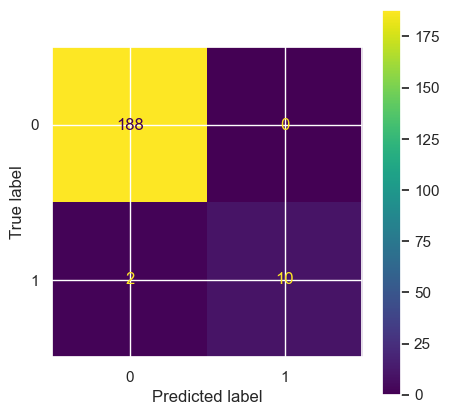

In [151]:
labels = [0,1]
cm = confusion_matrix(y_test, prediction, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();